In [1]:
%matplotlib inline
import sys; sys.path.append(_dh[0].split("visualize patterns")[0] + "visualize patterns")
from lib import *

In [2]:
cysum = load_variable("wos.all.uid.cysum")

In [3]:
cits = get_cnt("wos.all.uid.doc")

loading from ../120 _ count co-occurrences/wos_counter_larger/cnt_doc_fullUnique.pickle
dict_keys(['fj', 'fy', 'ty', 'fy.ty', 'fj.ty', 'jy', 'a', 'ay', 'aj', 'ajy', 'ac', 'c', 'cy', 'cj', 'cjy'])


In [4]:
groups = load_variable("groups.books")
groupsa = load_variable("groups.articles")

In [5]:
def beautiful_plot(alltop, myname=None, overwrite=True):

    cols = 5
    rows = len(alltop) // cols + bool(len(alltop) % cols) # = 15 for 5
    rows_per_group = 2
    groupsize = rows_per_group * cols
    gs = rows // rows_per_group + bool(rows % rows_per_group)

    for groupi in range(gs):
        myFnName = "time series.%s.%s" % (myname,groupi)
        if Path(myFnName).exists() and not overwrite:
            continue
        
        plt.figure(figsize=(cols*4,rows*1.2))
        plt.subplots_adjust(hspace=0.6, wspace=0)

        for i,x in enumerate(alltop[ groupi*groupsize : (groupi+1)*groupsize]):
            print(x)
            x = cysum[x]

            plt.subplot(rows,cols,i+1)

            nt = x['name']
            nt = nt.split("|")
            nt = (" ".join(nt[:-1]).title(), nt[-1])
            #summ(nt)

            cys = cysum[x['name']]

            #yrstart = max(1930, cys['pub'])
            #yrend = yrstart + 90
            #yrstart = 1930
            #yrend = 2020
            yrstart = 1900
            yrend = 2020
            years = range(yrstart, yrend)
            vals = [cits['cy'][x['name'],y] for y in years]

            plt.fill_between(years,vals,color='black',alpha=0.4)
            title = "%s (%s)" % (x['name'].split("|")[0].title(), x['pub'])
            t = plt.text(min(years), 1.1*(max(vals))/1,title, fontsize=14)#*3+min(vals)
            #t.set_bbox(dict(facecolor='gray', alpha=0.5, edgecolor='black'))
            plt.axis('off')
            #linestyles = ['--','-','-.']
            #for i,k in enumerate(['death1','death2','death3']):
            #    if x[k] is not None:
            #        plt.axvline(x[k],min(vals),max(vals),label=k,linestyle=linestyles[i],color='black')
            #plt.legend();
            #plt.ylim( plt.ylim()[0], plt.ylim()[0]*1.1 )
            if False:
                if plt.xlim()[0] < cys['pub'] < plt.xlim()[1]:
                    plt.vlines(cys['pub'], plt.ylim()[0],plt.ylim()[1]*0.7, linestyles=['--'])
                else:
                    plt.arrow(
                        1920, 
                        (max(vals)+min(vals)*3)/4,
                        -8,
                        0,
                    head_width=(max(vals)+min(vals))/(2*3))

            #from matplotlib.patches import Rectangle
            #extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
            #plt.legend([extra], (title,))

            lines = []
            for decade in range(yrstart,yrend,10):
                lines += [
                    (decade+1, decade+10-1), 
                    (-max(vals)/5, -max(vals)/5), 
                    'black'
                ]

            # labeling the max
            maxy = max(years, key=lambda y:cits['cy'][x['name'],y])

            if maxy > 2000:
                lines += [
                    (maxy-2, maxy - 10),
                    (max(vals)*1.05, max(vals)*1.2),
                    "black"
                ]
                plt.text(maxy - 10-4, max(vals)*1.2,max(vals), fontsize=12, verticalalignment='center', horizontalalignment='right')#*3+min(vals)
            else:
                lines += [
                    (maxy+1, maxy + 10),
                    (max(vals)*1.05, max(vals)*1.2),
                    "black"
                ]
                plt.text(maxy + 10+4, max(vals)*1.2,max(vals), fontsize=12, verticalalignment='center')#*3+min(vals)

            plt.plot(*lines)
            plt.scatter(
                [1900,1950,2000],
                [-max(vals)/5]*3,
                color='black',
                s=20
            )

        save_figure(myFnName)
        plt.show();

# what is this

In [6]:
cysum_filt = [x for x in cysum.values()]
#cysum_filt = sorted(cysum_filt, key=lambda z:-z['maxcount'])[:50]

In [7]:
len(cysum_filt)

401332

In [8]:
print("%s total entries" % len(cysum_filt))

count_in_range = defaultdict(int)
for (c,y),count in cits['cy'].items():
    if 1985 >= y >= 1975:
        count_in_range[c] += count

for i,x in enumerate(cysum_filt):
    x['count_in_range'] = count_in_range[x['name']]
    cysum_filt[i] = x

#cysum_filt = [x for x in cysum_filt if x['count_in_range']>=5]
#print("%s of them have at least 5 citations in range" % len(cysum_filt))

cysum_filt = [x for x in cysum_filt if x['count_in_range']>0]
print("%s total entries in 1985,1975" % len(cysum_filt))

401332 total entries
72887 total entries in 1985,1975


In [9]:
print("%s of those have died1" % len([_ for x in cysum_filt if x['death1'] is not None]))

71994 of those have died1


In [10]:
print("%s of those have not died1" % len([_ for x in cysum_filt if x['death1'] is None]))

893 of those have not died1


In [11]:
alldf = pd.DataFrame.from_records(cysum_filt)

In [12]:
alldf.shape

(72887, 15)

In [13]:
100 * 100/72887

0.1371986774047498

In [14]:
np.sum( np.isnan(alldf.death3) )

19002

In [15]:
19002/72887

0.26070492680450563

In [16]:
toptop = sorted(cysum_filt, key=lambda x: -x['count_in_range'])[:100]

In [17]:
toptop = pd.DataFrame.from_records(toptop)

In [18]:
toptop

,first,last,maxcounty,maxpropy,maxprop,maxcount,total,totalprop,name,type,pub,death3,death2,death1,count_in_range
0,1968,2019,1977,1975,0.034639,51,1279,0.759693,blau|am occupational syst,book,1964,NaN,NaN,1977.0,420
1,1950,2020,1969,1963,0.108407,59,1835,1.826838,merton|social theory soci 4,book,1905,NaN,NaN,1969.0,397
2,1940,2020,2015,1975,0.022590,35,1268,0.914421,durkheim|divison labor soc,book,1883,NaN,NaN,2015.0,272
3,1952,2020,1983,1956,0.051661,33,1137,1.151642,parsons|social systems evolu,book,1947,NaN,NaN,1983.0,250
4,1975,2020,1983,1983,0.026015,41,688,0.391149,braverman|labor monoply capita,book,1973,NaN,NaN,1983.0,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1972,2011,1981,1981,0.008425,13,118,0.075701,"goodman|1972| am sociol rev, v37, p28",article,1972,NaN,1986.0,1981.0,86
96,1967,2020,1979,1979,0.009988,16,321,0.176887,coleman|equal ed opportunity,book,1956,NaN,NaN,1979.0,85
97,1969,2019,1981,1981,0.008425,13,195,0.113256,lukacs|historical novel,book,1911,NaN,NaN,1981.0,84
98,1951,2020,1970,1963,0.026549,15,408,0.422950,homans|human group,book,1941,NaN,NaN,1970.0,83


In [19]:
toptop[~np.isnan(toptop.death3)]

,first,last,maxcounty,maxpropy,maxprop,maxcount,total,totalprop,name,type,pub,death3,death2,death1,count_in_range
42,1971,1995,1980,1978,0.010632,17,157,0.099064,nye|statistical package,book,1968,1995.0,1987.0,1980.0,116
65,1974,2004,1980,1980,0.009340,16,131,0.080892,kerlinger|multiple regression,book,1972,2004.0,1987.0,1980.0,101
73,1973,2008,1980,1976,0.007565,11,127,0.080776,"goodman|1972| am j sociol, v77, p1035",article,1972,2008.0,1988.0,1980.0,97


In [20]:
np.sum(np.isnan(toptop.death1))

1

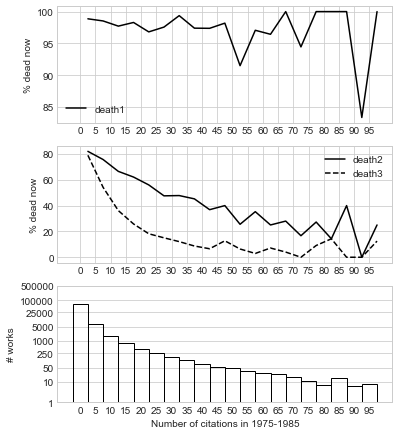

In [21]:
dying_count = defaultdict(lambda:defaultdict(int))

step = 5
counts = np.array(range(0,100,step))
linestyles = ['-','--','-.']

for x in cysum_filt:
        
    for dk in ['death1','death2','death3']:
        dying_count[dk][(
            (x['count_in_range']//step)*step,
            x[dk] is not None
        )] += 1
        dying_count[dk][(
            (x['count_in_range']//step)*step,
            "total"
        )] += 1

plt.subplots_adjust(top=1.5)

shift = 7.5

plt.subplot(3,1,1)
for i,dk in enumerate(['death1']):
    probs = np.array([ dying_count[dk][(c,True)]/dying_count[dk][(c,"total")] if dying_count[dk][(c,"total")] else float("nan") for c in counts ])
    plt.plot(counts+step/2,probs*100,label=dk,linestyle=linestyles[i], color='black')
plt.legend();
plt.xticks(counts)
plt.xlim(min(counts)-shift,max(counts)+shift)
plt.ylabel("% dead now")

plt.subplot(3,1,2)
for i,dk in enumerate(['death2','death3']):
    probs = np.array([ dying_count[dk][(c,True)]/dying_count[dk][(c,"total")] if dying_count[dk][(c,"total")] else float("nan") for c in counts ])
    plt.plot(counts+step/2,probs*100,label=dk,linestyle=linestyles[i], color='black')
plt.legend();
plt.xticks(counts)
plt.xlim(min(counts)-shift,max(counts)+shift)
#plt.xlabel("Number of citations")
plt.ylabel("% dead now")

totals = [ dying_count[dk][(c,"total")] for c in counts ]
plt.subplot(3,1,3)
plt.bar(counts,np.log10(totals),5,fill=False)

plt.xlabel("Number of citations in 1975-1985")
plt.ylabel("# works")
ytarget = np.array([1,10,50,250,1000,5000,25000,100000,500000])
plt.yticks(
    np.log10(ytarget),
    ytarget
)

plt.xticks(counts)
plt.grid(False,'both','x')
    
#plt.title("Proportion of citations published before 1980 dead$_i$ by 2010,\nby maximum citations received in one year")
save_figure("p dead by 2010.maxcount")
#plt.savefig('test.png', bbox_inches="tight")

In [22]:
years = range(1970,2020,1)
plt.figure(figsize=(12,5))
plt.stackplot(years,
             *[ [cits['cy'][(k,y)] for y in years] for k in keys ]);
plt.show();

plt.figure(figsize=(12,5))
for k in keys:
    plt.plot(years,
             [cits['cy'][(k,y)] for y in years], label=k);
plt.legend()
plt.show();

NameError: name 'keys' is not defined

<Figure size 864x360 with 0 Axes>

# analyze the top 1% - general

In [23]:
alltop = set()
alltop2 = set()
allalltop = set()
prop_dead3 = []
total_prop_dead3 = []

prop_dead2 = []
total_prop_dead2 = []

toptops = []

for RANGE_START, RANGE_END in zip(
    range(1940,1980+1,5),
    range(1950,1990+1,5),
):
    cysum_filt = [x for x in cysum.values()]
    #cysum_filt = sorted(cysum_filt, key=lambda z:-z['maxcount'])[:50]
    
    print("%s total entries" % len(cysum_filt))

    count_in_range = defaultdict(int)
    for (c,y),count in cits['cy'].items():
        if RANGE_END >= y >= RANGE_START:
            count_in_range[c] += count

    for i,x in enumerate(cysum_filt):
        x['count_in_range'] = count_in_range[x['name']]
        cysum_filt[i] = x

    #cysum_filt = [x for x in cysum_filt if x['count_in_range']>=5]
    #print("%s of them have at least 5 citations in range" % len(cysum_filt))

    cysum_filt = [x for x in cysum_filt if x['count_in_range']>0]
    print("%s total entries in %s,%s" % (len(cysum_filt), RANGE_START, RANGE_END))
    alldf = pd.DataFrame.from_records(cysum_filt)
    
    q995 = alldf.count_in_range.quantile(0.99)
    toptop = alldf[alldf.count_in_range>=q995]
    print(q995)
    print(toptop.shape)
    
    #toptop = alldf.sort_values("count_in_range", ascending=False)[:100]
    
    toptop = pd.DataFrame.from_records(toptop)
    topdead = toptop[~np.isnan(toptop.death3)]
    topdead2 = toptop[~np.isnan(toptop.death2)]
    
    
    alltop.update(topdead.name)
    alltop2.update(topdead2.name)
    allalltop.update(toptop[np.isnan(toptop.death3)].name)
    print(topdead.shape)
    
    toptops.append(toptop)
    
    prop_dead3.append(topdead.shape[0]/toptop.shape[0])
    total_prop_dead3.append(alldf[~np.isnan(alldf.death3)].shape[0]/alldf.shape[0])
    prop_dead2.append(topdead2.shape[0]/toptop.shape[0])
    total_prop_dead2.append(alldf[~np.isnan(alldf.death2)].shape[0]/alldf.shape[0])

401332 total entries
3522 total entries in 1940,1950
13.0
(42, 15)
(11, 15)
401332 total entries
4796 total entries in 1945,1955
15.0
(51, 15)
(7, 15)
401332 total entries
7368 total entries in 1950,1960
15.0
(82, 15)
(15, 15)
401332 total entries
11963 total entries in 1955,1965
19.0
(121, 15)
(16, 15)
401332 total entries
19490 total entries in 1960,1970
24.0
(196, 15)
(18, 15)
401332 total entries
32027 total entries in 1965,1975
28.0
(331, 15)
(44, 15)
401332 total entries
51105 total entries in 1970,1980
29.0
(539, 15)
(61, 15)
401332 total entries
72887 total entries in 1975,1985
28.0
(745, 15)
(62, 15)
401332 total entries
94857 total entries in 1980,1990
27.0
(990, 15)
(55, 15)


In [25]:
toptops = pd.concat(toptops)

In [26]:
save_variable( "top_1percent.df", toptops )

In [11]:
list(alltop)[0]

'suits|1957| j am stat assoc, v52, p548'

In [12]:
len(alltop)

163

In [16]:
topdf = pd.DataFrame.from_records([cysum[x] for x in alltop])

In [34]:
[x for x in groups if groups[x] == groups['weber|economy society outl']]

['weber|economy soc',
 'weber|law economy soc',
 'weber|economy soc outline',
 'weber|economy society outl',
 'weber|economy society']

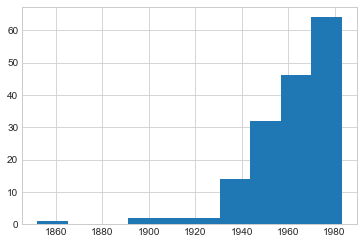

In [14]:
topdf.pub.hist()

In [15]:
topdf.sort_values("pub")[:50]

,first,last,maxcounty,maxpropy,maxprop,maxcount,total,totalprop,name,type,pub,death3,death2,death1,count_in_range
138,1968,2002,1977,1977,0.003868,6,36,0.024815,marx|18th brumaire l bona,book,1852,2002,1983,1977,12
162,1963,2004,1990,1966,0.004484,4,69,0.051600,gouldner|sociology trial,book,1900,2004,2001,1990,28
143,1957,2007,1980,1966,0.004484,6,58,0.051159,james|varieties religious,book,1902,2007,2001,1980,6
70,1960,1982,1979,1979,0.006242,10,37,0.030640,simmel|sociol g simmel,book,1908,1982,1981,1979,19
13,1914,1999,1965,1914,0.166667,6,59,0.435579,yule|intro theory stat,book,1911,1999,1980,1965,6
93,1966,1997,1977,1975,0.011295,16,87,0.066464,weber|economy society outl,book,1921,1997,1977,1977,1
88,1930,1994,1947,1947,0.042857,6,46,0.202908,lundberg|soc res,book,1929,1994,1966,1947,5
45,1932,1976,1942,1932,0.025641,3,32,0.195800,murphy|exptl social psychol,book,1931,1976,1969,1942,0
104,1940,1989,1949,1949,0.026316,4,29,0.147204,zimmerman|changing community,book,1935,1989,1961,1949,3
125,1937,2003,1952,1947,0.021429,4,30,0.123055,davidson|occupational mobilit,book,1936,2003,1975,1952,2


In [16]:
topdf.shape

(163, 15)

In [17]:
[x for x in alltop if 'weber' in x]

['weber|economy society outl']

100
marx|18th brumaire l bona
gouldner|sociology trial
james|varieties religious
simmel|sociol g simmel
yule|intro theory stat
lundberg|soc res
murphy|exptl social psychol
odum|am regionalism
lundberg|fdn sociology
young|personality problems


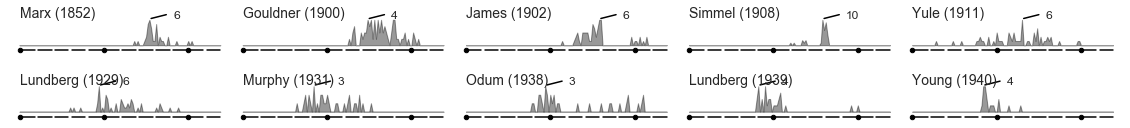

kardiner|psychol frontiers so
redfield|fold culture yucatan
hagood|stat sociologists
sanderson|rural sociology rura
sewell|1943| rural sociol, v8, p161
moore|ind relations social
sorokin|soc culture personal
parsons|towards general theo
kendall|rank correlation met
warner|soc class am


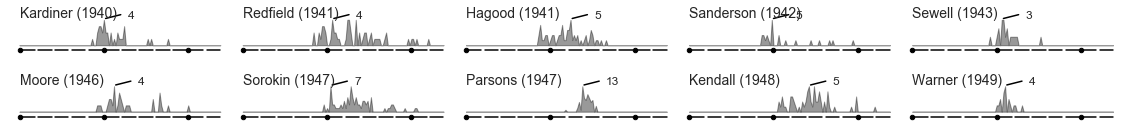

bogue|structure metropolit
locke|predicting adjustmen
rose|theory methods socia
bogue|population us
duncan|social characteristi
becker|values social interp
robinson|measures social psyc
freedman|principles sociology
kahl|am class structure
kerr|labor mobility ec op


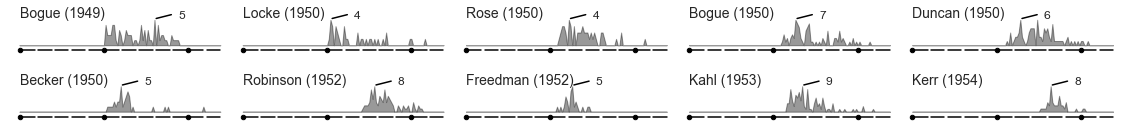

easton|systems analysis pol
parsons|economy soc study in
strodtbeck|talent soc
edwards|technique attitude s
suits|1957| j am stat assoc, v52, p548
gouldner|s sociological theor
rosen|1959| am sociol rev, v24, p47
bogue|principles demograph
selltiz|res methods social r
lenski|religious factor soc


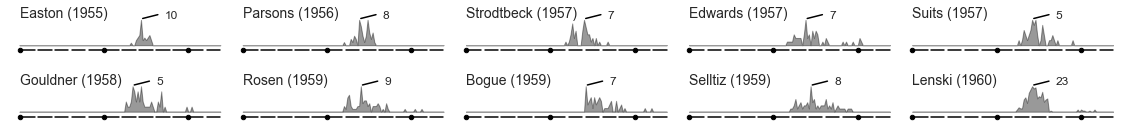

kerr|industrialism ind ma
mueller|statistical reasonin
winter|statistical principl
kornhauser|scientists industry
williams|strangers next door
banfield|city politics
coleman|intro mathematical s
russet|world hdb political
carter|assessment quality g
erbe|1964| am sociol rev, v29, p198


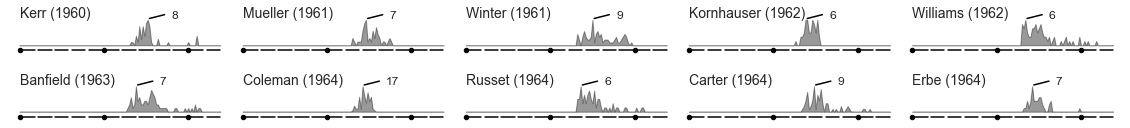

woodward|industrial organisat
inkeles|modernization dynami
cicourel|social organization
flacks|1967| j soc issues, v23, p52
clark|community structure
hess|development politica
land|sociological methodo
heise|soc methodology
demerath|religion social cont
hamilton|class politics us


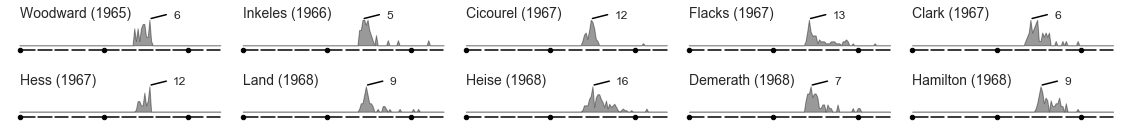

bohrnstedt|soc methodology
grizzle|1969| biometrics, v25, p489
bowen|ec labor force parti
skolnick|politics protest vio
turk|1970| am sociol rev, v35, p1
boyle|1970| am j sociol, v75, p461
quinney|criminology anal cri
aiken|structure community
grebler|mexican am people
zimbalist|case studies labour


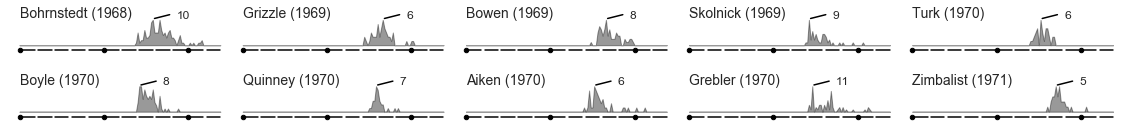

schur|labelling deviance e
goodman|1971| technometrics, v13, p33
shryock|methods materials de
sweet|women labor force
goodman|1972| am j sociol, v77, p1035
nie|participation am pol
davis|sociol methodol
nettler|explaining crime
duncan|social change metrop
zimmerman|language sex differe


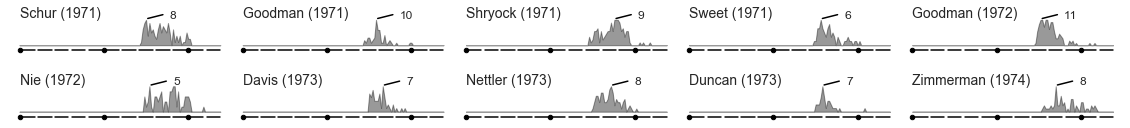

dohrenwend|stressful life event
hagen|1974| law soc rev, v8, p357
radloff|1975| sex roles, v1, p249
chiricos|1975| am sociol rev, v40, p753
hindness|precapitalist modes
featherman|1975| soc sci res, v4, p339
cutler|marxs capital capita
chirot|social change 20th c
kimberly|1976| admin sci quart, v21, p571
mcclendon|1976| am sociol rev, v41, p52


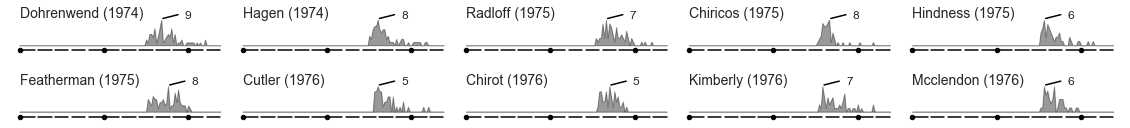

roof|community commitment
latour|laboratory life soci
hindelang|1978| am sociol rev, v43, p93
horan|1978| am sociol rev, v43, p534
duncan|sex typing social ro
schmidt|grundriss empirisc 1
thurow|zero-sum soc
swafford|1980| am sociol rev, v45, p644
kaufman|1981| soc sci res, v10, p1
burawoy|1983| am sociol rev, v48, p587


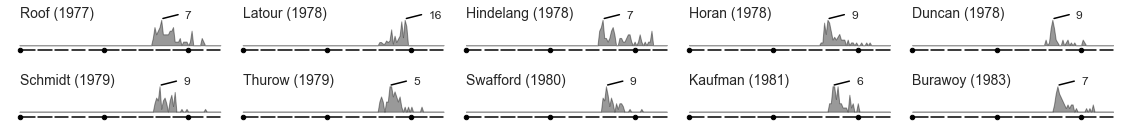

In [42]:
from random import sample

toplot = toptops[~np.isnan(toptops.death3)].get("name")
blacklist = ['weber|economy society outl']
toplot = [x for x in toplot if x not in blacklist]

toplot = sorted(set(toplot))
toplot = sample(toplot, 100)

toplot = sorted(toplot, key=lambda x: cysum[x]['pub'])
#blacklist = ['american']
#alltop = [x for x in alltop if x not in blacklist]
print(len(toplot))

beautiful_plot( toplot, myname="big_dead3_citations", overwrite=True )

In [15]:
alldf.columns

Index(['first', 'last', 'maxcounty', 'maxpropy', 'maxprop', 'maxcount',
       'total', 'totalprop', 'name', 'type', 'pub', 'death3', 'death2',
       'death1', 'count_in_range'],
      dtype='object')

In [47]:
toptops[
    np.isnan(toptops.death3)
].shape

(2808, 15)

In [111]:
[x for x in set(toptop.name) if 'american' in x]

['american|diagn stat man ment']

toennies|community soc
aries|centuries childhood
durkheim|morality soc
weber|wirtschaft gesells 3
weber|economy society outl
sorokin|principles ruralurba
mead|philosophy present
radcliffebrown|structure function p
lundberg|fdn sociology
wilson|acad man study socio


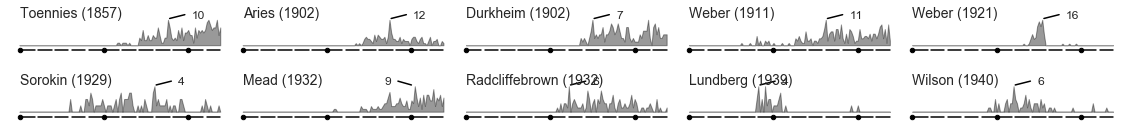

sutherland|1940| am sociol rev, v5, p1
levistrauss|elementary structure


KeyboardInterrupt: 

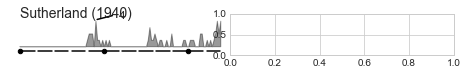

In [151]:
# sort by death date :D

from random import sample
alltop = sample(set(toptops.name), 100)
alltop = sorted(alltop, key=lambda x: cysum[x]['pub'])
blacklist = ['american']
alltop = [x for x in alltop if x not in blacklist]

beautiful_plot( alltop, myname="biggest_citations_100" )

boas|shaping am anthr 188
brodie|sea power machine ag
brutzkus|class status power
cunliffe|g washington man mon
sthughes|consciousness soc
mayer|1959| kyklos, v12, p605
jacobs|death life great am
haskell|1960| soc probl, v8, p220
zola|other side perspecti
cass|1965| rev econ stud, v32, p233


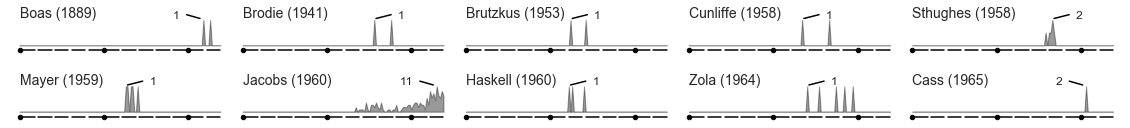

klein|1968| j health soc behav, v9, p139
hackler|1970| sociol quart, v11, p511
delmatier|rumble california po
palmore|1971| soc forces, v50, p84
labov|new ways anal sound
huber|sex stratification c
azzi|1975| j political ec, v84, p27
cantor|1975| ann sci, v32, p195
westhues|1976| sociological anal, v37, p200
attewell|1980| am sociol rev, v45, p325


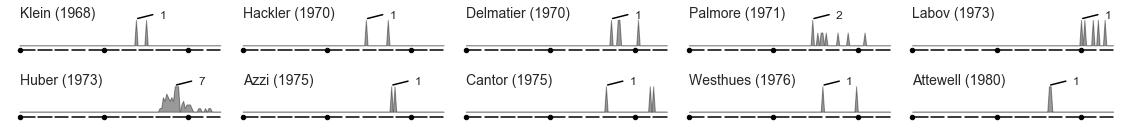

williams|acer res monograph
fieldhouse|colonialism 1870 194
tesh|1981| j health polit polic, v6, p369
radford|nature criticism
bloch|1982| adv consum res, v9, p413
martin|1982| popul res policy rev, v1, p19
nayha|1983| acta psychiat scand, v67, p32
zimmerman|meaning form use con
baudrillard|evil demon images
zeira|1985| int studies manageme, v15, p33


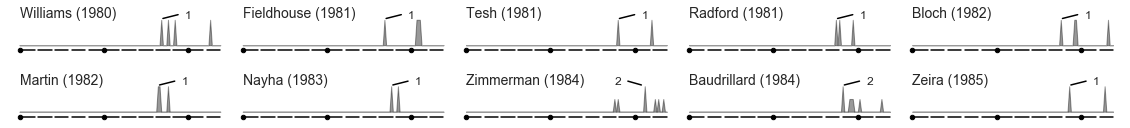

robbins|diet new am
denzin|1988| theor cult soc, v5, p461
lumley|museum time machine
oguinn|1989| j consum res, v16, p147
cross|quest time reduction
baranski|culture conflict pos
lazear|1990| j labor econ, v8, ps106
kowalski|1990| rural sociol, v55, p76
levy|1991| gender soc, v5, p67
van|demographic destinie


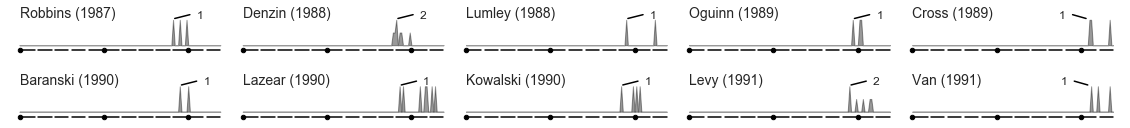

caspi|1991| j pers soc psychol, v61, p157
matthews|widowhood later life
kurdek|1991| dev psychol, v27, p627
hofbeck|env dev
blieszner|1992| gender families elde, p105
norris|1992| am j commun psychol, v20, p625
metcalf|1993| j asian stud, v52, p584
hindera|1993| soc sci quart, v74, p95
katz|entrepreneurship the
bean|1994| int j public opin r, v6, p264


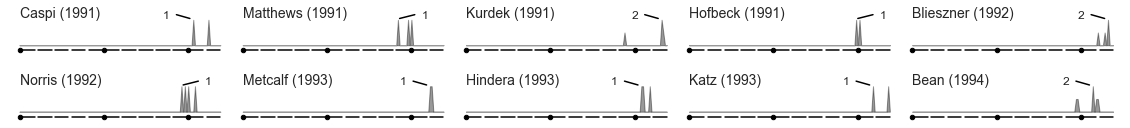

lawrence|food syst agrar ch
modood|1994| sociology, v28, p859
samuel|theatres memory
thompson|1994| teach sociol, v22, p65
wallace|1995| j european social po, v5, p97
mortimore|key characteristics
webb|prehistories future
alm|1995| kyklos, v48, p3
ge|1996| dev psychol, v32, p717
corcoran|1998| soc work health care, v27, p49


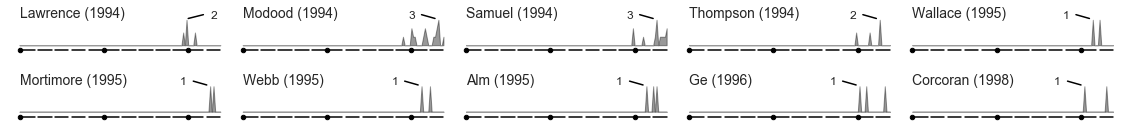

tress|1998| ethnic racial stud, v21, p116
berbrier|1999| sociol quart, v40, p411
penn|1999| environ plann b, v26, p193
united|urb rur class
wheeler|pl s soc cl
meshcherkina|gender state soc sov
gleeson|2001| urban stud, v38, p251
bickel|2001| j women health gen-b, v10, p261
lankford|2001| j urban econ, v50, p288
wackerbarth|2002| alz dis assoc dis, v16, p213


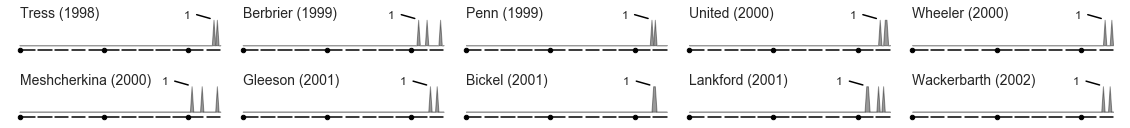

graham|2002| urban stud, v39, p1003
hansen|2003| int j psychophysiol, v48, p263
lewis|2004| sex transm infect, v80, p423
hilton|2004| j consum cult, v4, p101
tuntiya|2005| sociol inq, v75, p153
hodge|2006| j soc work educ, v42, p637
cohen|household gods brit
akcapar|2006| int migr rev, v40, p817
chan|2007| am j sociol, v112, p1095
lim|working military rev


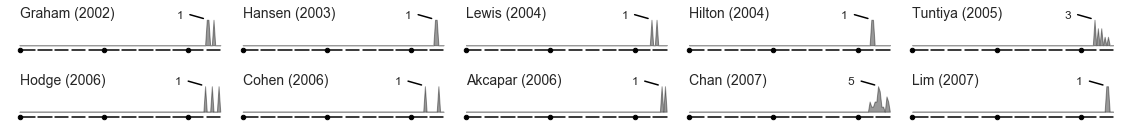

bisin|2008| j eur econ assoc, v6, p445
siren|2008| interciencia, v33, p186
faostat|food agr org stat da
bollinger|wage gap estimation
xu|2009| int j tour res, v11, p255
keeley|2009| sociol health ill, v31, p734
roberts|2009| brit j sociol educ, v30, p647
kwek|2010| asia pac j tour res, v15, p129
huschek|2010| demogr res, v22, p473
al|making equality coun


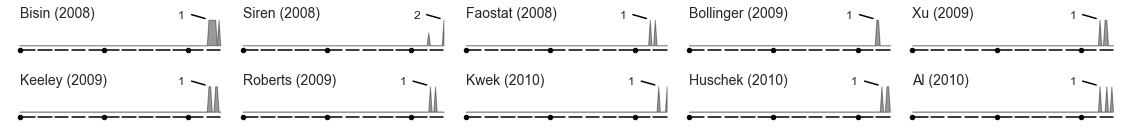

opp|2011| j math sociol, v35, p209
grebely|2011| j infect dis, v203, p571
macdonald|2011| j sociol, v47, p427
thomas|2014| ethnic racial stud, v37, p1467
lee|connected viewing: selling
wacquant|2014| body soc, v20, p3
pager|2015| am j sociol, v120, p1005
copes|2016| justice q, v33, p134
blitzer|new yorker
simonson|freiwilliges engagem


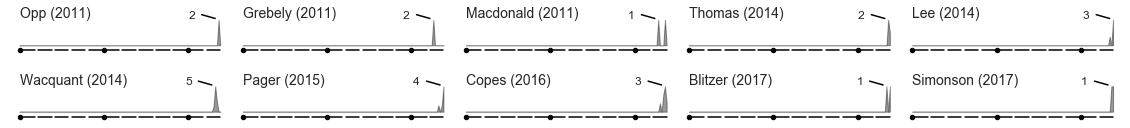

In [153]:
# sort by death date :D

from random import sample
alltop = sample(list(cysum), 100)
alltop = sorted(alltop, key=lambda x: cysum[x]['pub'])
#blacklist = ['american']
#alltop = [x for x in alltop if x not in blacklist]

beautiful_plot( alltop, myname="any_citations_100" )

veblen|engineers price syst
shumpeter|capitalism socialism
komarovsky|1946| am sociol rev, v11, p686
polsby|1959| am sociol rev, v24, p796
grusky|1959| am j sociol, v65, p59
strauss|psychiatric ideologi
agger|1961| j polit, v23, p477
susser|sociology med
sussman|social structure fam
wilkinson|prefects brit leader


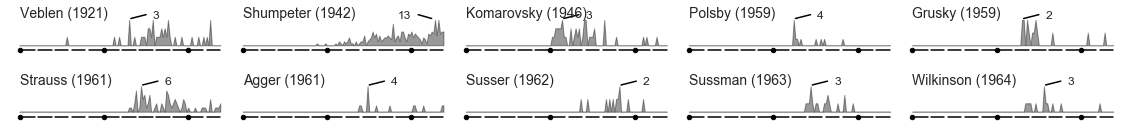

halmos|faith counsellors
delphy|main enemy mat anal
brandes|am welfare capitalis
benson|1973| j sci stud relig, v12, p297
pomerantz|thesis u california
becker|1974| am sociol rev, v39, p767
gibbs|1975| soc forces, v53, p468
inciardi|careers crime
spanier|1976| j marriage fam, v38, p15
clifton|1976| teach sociol, v3, p138


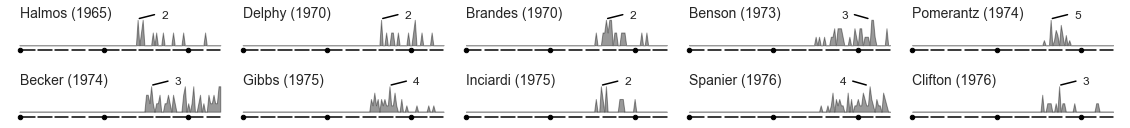

moore|law process
frank|dependent accumulati
vanfossen|structure social ine
markus|anal panel data
cuellar|1980| hispanic j behaviora, v2, p199
george|quality life older p
myers|1980| am j psychiat, v137, p1081
hartstock|discovering reality
mcneill|pursuit power
dahl|dilemmas pluralist d


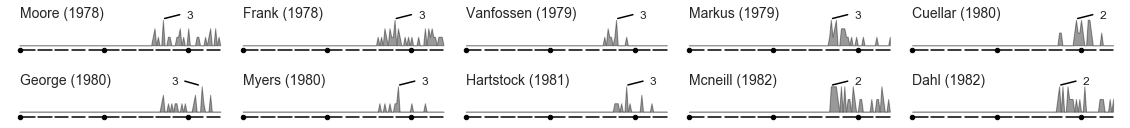

gurak|1982| am j sociol, v87, p921
lindblom|1982| j polit, v44, p324
mckee|public private
marchak|green gold forest in
rabinow|foucault reader intr
mannell|1984| loisir soc-soc leis, v7, p229
prucha|great father us govt
horowitz|1985| gerontologist, v25, p612
felson|reasoning criminal r
hall|marxism interpretati


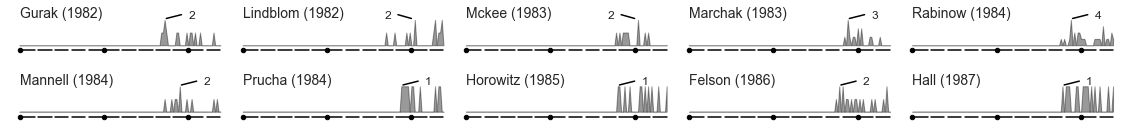

verdaasdonk|1987| poetics, v16, p237
mann|1987| sociology, v21, p339
engle|1987| econometrica, v55, p251
wetherall|mapping language rac
coates|women their speech c
bromley|ec interests i
foley|learning capitalist
patterson|1990| j leisure res, v22, p259
hacker|2 nations
howell|1992| environ behav, v24, p134


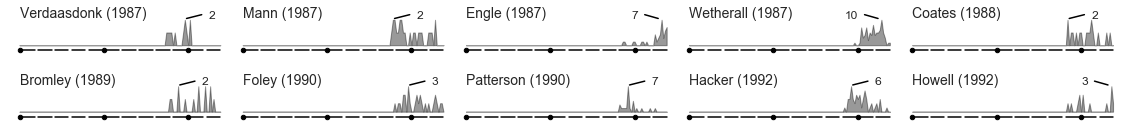

phillips|1992| soc sci quart, v73, p340
dunbar|1993| behav brain sci, v16, p681
levin|1994| soc sci med, v38, p1475
shihadeh|1994| soc forces, v73, p729
huberman|hdb qualitative res
sutton|1994| am j sociol, v99, p944
putnam|1995| ps, v28, p664
wodak|disorders discourse
fukuyama|trust social virtues
maccallum|1996| psychol methods, v1, p130


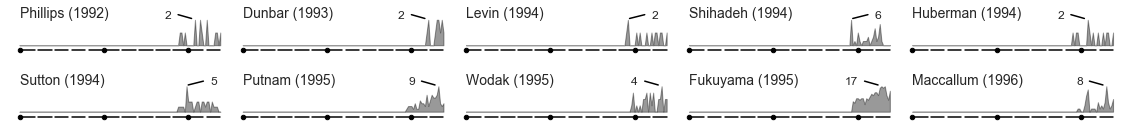

offe|varieties transition
sampson|dev theories crime d
ching|knowing your place r
goodwin|1998| j rural stud, v14, p5
rountree|1998| j res crime delinq, v35, p341
blommaert|debating diversity
kirkpatrick|attachment evolution
lehrer|1999| soc sci res, v28, p358
guarnizo|1999| ethnic racial stud, v22, p367
preston|demography measuring


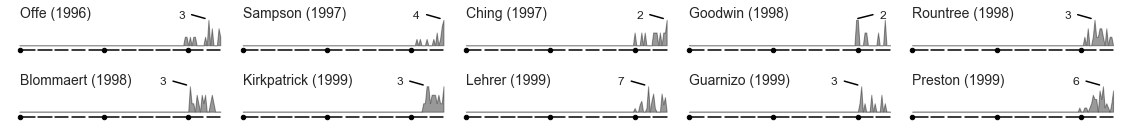

teachman|2000| j marriage fam, v62, p1234
sargeant|seeker churches prom
ross|2000| am j commun psychol, v28, p401
mahoney|2000| j adolescence, v23, p113
vazsonyi|2001| j res crime delinq, v38, p91
archer|higher ed social cla
lucas|2002| sociol educ, v75, p328
steenbergen|2002| am j polit sci, v46, p218
grimes|2003| j world systems res, v9, p261
glover|2003| j leisure res, v35, p190


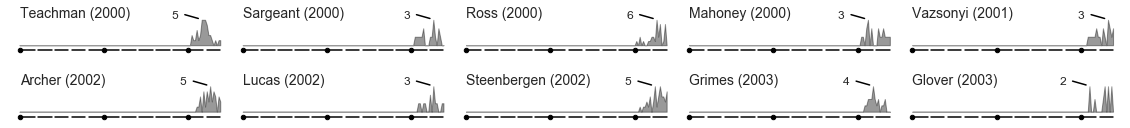

pahl|2004| curr sociol, v52, p199
andrews|2004| annu rev sociol, v30, p479
park|2005| j soc issues, v61, p707
house|2005| j gerontol b-psychol, v60, p15
jamal|2005| am polit res, v33, p521
delanty|2006| brit j sociol, v57, p25
edensor|2007| soc cult geogr, v8, p199
shariff|2007| psychol sci, v18, p803
cottle|2008| media cult soc, v30, p853
buskens|hdb rational choice


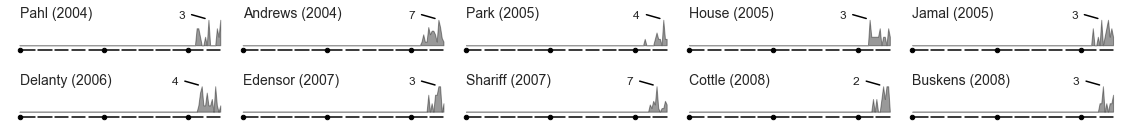

crompton|2008| sociology, v42, p1218
reed|2008| biol conserv, v141, p2417
lalive|2009| q j econ, v124, p1363
mahoney|2009| comp polit stud, v42, p114
shihadeh|2010| sociol inq, v80, p628
sikkink|the justice cascade
mccormack|declining significan
engelen|great complacence
calhoun|2013| brit j sociol, v64, p26
baker|sch soc ed transform


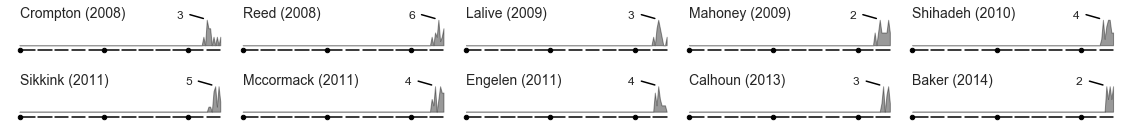

In [154]:
# sort by death date :D

from random import sample
alltop = []
for decade in range(1920, 2020):
    alltop += sample([x for x in cysum if cysum[x]['total'] >= 10 and cysum[x]['pub']<decade)]), 10)
alltop = sorted(alltop, key=lambda x: cysum[x]['pub'])
#blacklist = ['american']
#alltop = [x for x in alltop if x not in blacklist]

beautiful_plot( alltop, myname="citations_gt10_100" )

In [159]:
alldf = pd.DataFrame.from_records(list(cysum.values()))

In [160]:
alldf.columns

Index(['first', 'last', 'maxcounty', 'maxpropy', 'maxprop', 'maxcount',
       'total', 'totalprop', 'name', 'type', 'pub', 'death3', 'death2',
       'death1', 'count_in_range'],
      dtype='object')

In [183]:
alldf.shape

(401332, 15)

In [182]:
alldf[alldf.total >= 10]

,first,last,maxcounty,maxpropy,maxprop,maxcount,total,totalprop,name,type,pub,death3,death2,death1,count_in_range
0,2016,2020,2019,2020,0.008746,7,18,0.013196,anderson|us them dangerous po,book,2013,NaN,NaN,NaN,0
2,1962,2020,2017,2020,0.005831,13,153,0.087181,arendt|human condition,book,1952,NaN,NaN,NaN,17
11,2011,2020,2017,2020,0.002915,4,23,0.009964,"fox|2008| ethnicities, v8, p536",article,2008,NaN,NaN,NaN,0
15,2010,2020,2018,2020,0.002915,2,10,0.005887,isin|acts citizenship,book,2008,NaN,NaN,NaN,0
16,2011,2020,2018,2020,0.002915,4,16,0.007777,"isin|2009| subjectivity, v29, p367",article,2009,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399621,1935,1961,1952,1935,0.018182,3,12,0.078505,mowrer|family,book,1932,1961.0,1953.0,1952.0,0
399732,1946,1960,1959,1948,0.013699,2,13,0.059141,davis|father man,book,1947,1960.0,1959.0,1959.0,0
399840,1937,1959,1938,1937,0.035714,3,18,0.146382,brown|psychol social order,book,1936,1959.0,1950.0,1938.0,0
400146,1939,1956,1950,1950,0.011111,2,11,0.066693,"davie|1939| am j sociol, v44, p510",article,1939,1956.0,1953.0,1950.0,0


In [1]:
ps = [0, 10, 40, 100, 400]
for pi in range(len(ps)-1):
    alldf.total.hist(bins=50)
    plt.xlim((ps[pi],ps[pi+1]))
    
    plt.show()

NameError: name 'alldf' is not defined

In [162]:
alldf[alldf.total>10].total.shape

(40711,)

In [163]:
alldf[alldf.total==10].total.shape

(5583,)

In [ ]:
alldf[]

In [117]:
np.min(toptops.death3)

1964.0

In [144]:
len(set(toptops.name))

1361

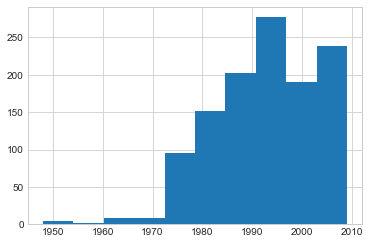

In [23]:
toptops[~np.isnan(toptops.death2)].death2.hist()

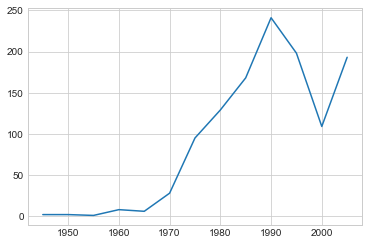

In [26]:
#yrs = [cysum[x]['death2'] for x in alltop if cysum[x]['pub'] < 1970]
yrs = np.array(toptops[~np.isnan(toptops.death2)].death2, dtype='int')
yrc = Counter([(x//5)*5 for x in yrs])

years = range(min(yrc), max(yrc)+1, 5)
counts = [yrc[y] for y in years]
plt.plot(years, counts)

<1940 75
1950-1960 231
1960-1970 371
1970-1980 373


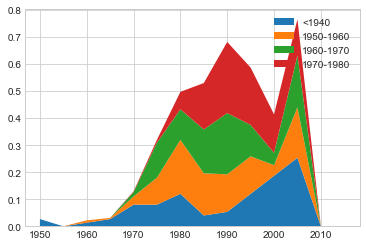

In [59]:
#yrs = [cysum[x]['death2'] for x in alltop if cysum[x]['pub'] < 1970]
withdeath = toptops[~np.isnan(toptops.death2)]

step = 10
trends = []
labels = []

years = range(1950, 2020, 5)

minyear = 1940
maxyear = 1970

for i in range(minyear, maxyear+step,step):
    if i == minyear:
        yrs = np.array(withdeath[withdeath.pub < minyear].death2, dtype='int')
        labels.append("<%s"%minyear)
    else:
        yrs = np.array(withdeath[np.logical_and(
            i <= withdeath.pub,
            withdeath.pub < i+step
        )].death2, dtype='int')
        labels.append("%s-%s"%(i,i+step))
        
    yrc = Counter([(x//5)*5 for x in yrs])
    
    counts = np.array([yrc[y] for y in years])
    trends.append(counts/np.sum(counts))
    
    print(labels[-1], np.sum(counts))
    
plt.stackplot(years, trends, labels=labels)
#for i,trend in enumerate(trends):
#    plt.plot(years,trend,label=labels[i])
plt.legend()

<1930 12
1940-1950 84
1950-1960 179
1960-1970 283
1970-1980 270


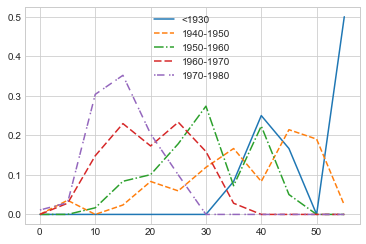

In [68]:
#yrs = [cysum[x]['death2'] for x in alltop if cysum[x]['pub'] < 1970]
withdeath = toptops[np.logical_and(
    ~np.isnan(toptops.death2),
    toptops.death2 < 2000
)]

step = 10
trends = []
labels = []

years = range(0, 60, 5)

minyear = 1930
maxyear = 1970

for i in range(minyear, maxyear+step,step):
    if i == minyear:
        myfilt = withdeath[withdeath.pub < minyear]
        labels.append("<%s"%minyear)
    else:
        myfilt = withdeath[np.logical_and(
            i <= withdeath.pub,
            withdeath.pub < i+step
        )]
        labels.append("%s-%s"%(i,i+step))
        
    yrs = np.array(myfilt.death2 - myfilt.pub, dtype='int')    
    yrc = Counter([(x//5)*5 for x in yrs])
    
    counts = np.array([yrc[y] for y in years])
    trends.append(counts/np.sum(counts))
    
    print(labels[-1], np.sum(counts))

linestyles = ['-','--','-.',(0, (5, 2)),(0, (1, 1,5,3))]

if False:
    plt.stackplot(years, labels=labels, *trends)
else:
    for i,trend in enumerate(trends):
        plt.plot(years,trend,label=labels[i],linestyle=linestyles[i])
plt.legend()

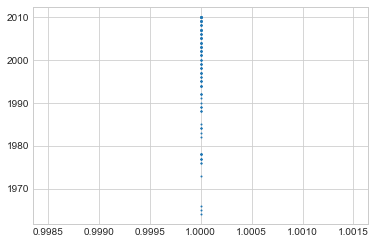

In [25]:
plt.scatter([1]*len(alltop), [cysum[x]['death3'] for x in alltop], s=1)

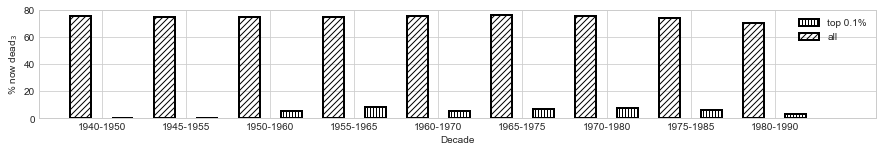

In [36]:
plt.figure(figsize=(15,2))

b1 = plt.bar(
    np.array(range(len(prop_dead3)))+0.25,
    100*np.array(prop_dead3),
    0.25,
    label='top 0.1%',
    hatch='||||',
    linewidth=2,
    fill=False
)

b2 = plt.bar(
    np.array(range(len(total_prop_dead3)))-0.25,
    100*np.array(total_prop_dead3),
    0.25,
    label='all',
    hatch='////',
    linewidth=2,
    fill=False
)

#b1.set_hatch('-')
#b2.set_hatch('o')

plt.xticks(
    range(len(prop_dead3)),
    ["%s-%s" % x for x in zip(
        range(1940,1980+1,5),
        range(1950,1990+1,5),
    )]
)
#plt.title("The 0.1% which are now dead$_3$, by decade of fame")
#plt.ylim((0,20))
plt.ylabel("% now dead$_3$")
plt.xlabel("Decade");
plt.xlim(-0.75,len(prop_dead3)+0.2)
plt.legend();
save_figure("dead3-0.1perc-decade")

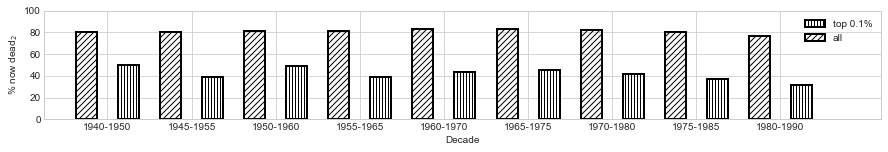

In [146]:
plt.figure(figsize=(15,2))

b1 = plt.bar(
    np.array(range(len(prop_dead2)))+0.25,
    100*np.array(prop_dead2),
    0.25,
    label='top 0.1%',
    hatch='||||',
    linewidth=2,
    fill=False
)

b2 = plt.bar(
    np.array(range(len(total_prop_dead2)))-0.25,
    100*np.array(total_prop_dead2),
    0.25,
    label='all',
    hatch='////',
    linewidth=2,
    fill=False
)

#b1.set_hatch('-')
#b2.set_hatch('o')

plt.xticks(
    range(len(prop_dead2)),
    ["%s-%s" % x for x in zip(
        range(1940,1980+1,5),
        range(1950,1990+1,5),
    )]
)
#plt.title("The 0.1% which are now dead$_3$, by decade of fame")
#plt.ylim((0,20))
plt.ylabel("% now dead$_2$")
plt.xlabel("Decade");
plt.xlim(-0.75,len(prop_dead2)+0.2)
plt.ylim(0,100)
plt.legend();
save_figure("dead2-0.1perc-decade")

# I need to double check I'm not missing others

In [99]:
for name in alltop:
    # find best repr
    if name in groups:
        my = [x for x in groups if groups[x] == groups[name] and x in cysum]
    else:
        my = [x for x in groupsa if groupsa[x] == groupsa[name] and x in cysum]
    best = max(my, key=lambda y: cits['c'][y])
    
    sp = best.split("|")
    a, tit = sp[0], "|".join(sp[1:])
    a = a+"|"
    tit = "|"+tit
    
    display(HTML("<h3>%s (%s)</h3>"%(best, str(my))))
    
    print("\n".join(sorted(y for y in cysum if a in y)[:10]))
    print("-------------------------")
    print("\n".join(sorted(y for y in cysum if tit in y)[:10]))

andrews|1892| int j ethics, v2, p281
andrews|1951| am sociol rev, v16, p541
andrews|1967| j appl psychol, v51, p39
andrews|1970| j dev areas, v4, p211
andrews|1970| organ behav hum perf, v5, p266
andrews|1972| biometrics, v28, p125
andrews|1973 m am soc ass ne
andrews|1973| j dev areas, v8, p3
andrews|1974| soc indic res, v1, p1
andrews|1974| soc indic res, v1, p279
-------------------------
andrews|multiple classificat
klem|multiple classificat


barber|1941| am sociol rev, v6, p663
barber|1952| soc forces, v31, p124
barber|1956| am sociol rev, v21, p129
barber|1958| am j sociol, v64, p128
barber|1959| pac sociol rev, v2, p25
barber|1961| pac sociol rev, v4, p3
barber|1961| science, v134, p596
barber|1963| am sociol rev, v28, p298
barber|1963| daedalus, v92, p669
barber|1968| mens maatschappij, v43, p501
-------------------------
abrams|social stratificatio
barber|social stratificatio
baron|social stratificatio
beeghley|social stratificatio
bergel|social stratificatio
berreman|social stratificatio
bertaux|social stratificatio
bonacich|social stratificatio
breton|social stratificatio
broom|social stratificatio


becker|16 j hopk u ctr res
becker|1931| j abnorm soc psych, v26, p58
becker|1932| sociol rev, v24, p138
becker|1932| sociol rev, v24, p266
becker|1940| am sociol rev, v5, p40
becker|1941| am sociol rev, v6, p155
becker|1942| am sociol rev, v7, p13
becker|1942| philos phenomenologi, v2, p310
becker|1950| soc forces, v28, p361
becker|1951| am j sociol, v57, p136
-------------------------
becker|values social interp


bogue|1949| am sociol rev, v14, p236
bogue|1951| agr hist, v25, p169
bogue|1952| am j sociol, v57, p565
bogue|1955| am j sociol, v60, p471
bogue|1956| rural sociol, v21, p267
bogue|1964| demography, v1, p42
bogue|1967| public interest, v7, p11
bogue|1968| j contemp hist, v3, p5
bogue|1975| am j polit sci, v19, p207
bogue|1979| popul dev rev, v5, p479
-------------------------
bogue|population us
kennedy|population us 1860 c


bogue|1949| am sociol rev, v14, p236
bogue|1951| agr hist, v25, p169
bogue|1952| am j sociol, v57, p565
bogue|1955| am j sociol, v60, p471
bogue|1956| rural sociol, v21, p267
bogue|1964| demography, v1, p42
bogue|1967| public interest, v7, p11
bogue|1968| j contemp hist, v3, p5
bogue|1975| am j polit sci, v19, p207
bogue|1979| popul dev rev, v5, p479
-------------------------
bogue|structure metropolit


bohrnstedt|1968| j sci stud relig, v7, p255
bohrnstedt|1969| am sociol rev, v34, p542
bohrnstedt|1969| j coll st personnel, v10, p36
bohrnstedt|1969| sociol methodol, v1, p113
bohrnstedt|1983| j pers soc psychol, v45, p43
bohrnstedt|28th ann m ger soc l
bohrnstedt|attitude measurement
bohrnstedt|handbook of survey research
bohrnstedt|hdb survey res
bohrnstedt|soc methodology
-------------------------
armor|soc methodology 1973
bohrnstedt|soc methodology
bonacich|soc methodology 1980
burt|soc methodology 1977
clarridge|soc methodology 1978
davis|soc methodology 1973
duncan|soc methodology 1979
erickson|soc methodology 1979
hannan|soc methodology
hauser|soc methodology


bowen|1943| q j econ, v58, p27
bowen|1966| compr psychiat, v7, p345
bowen|1974| ann ny acad sci, v233, p115
bowen|1986| adolescence, v21, p623
bowen|1986| eval program plann, v9, p209
bowen|1986| j asian stud, v45, p545
bowen|1989| armed forces soc, v15, p571
bowen|1989| comp stud soc hist, v31, p671
bowen|1991| journal of tourism studies, v2, p43
bowen|1991| women health, v17, p123
-------------------------
bowen|ec labor force parti


boyle|1966| am j sociol, v71, p628
boyle|1966| am sociol rev, v31, p706
boyle|1966| am sociol rev, v31, p843
boyle|1969| sociometry, v32, p99
boyle|1970| am j sociol, v75, p461
boyle|1970| sociometry, v33, p123
boyle|1980| j drug issues, v10, p109
boyle|1982| am polit sci rev, v76, p371
boyle|1985| canadian j women law, v1, p93
boyle|1985| land econ, v61, p188
-------------------------
boyle|1970| am j sociol, v75, p461


barvosa-carter|forging radical alli
carter|1952| j educ psychol, v43, p218
carter|1954| pers psychol, v7, p477
carter|1958| public opin quart, v22, p133
carter|1964| am behavioral scient, v8, p20
carter|1966| demography, v3, p276
carter|1967| j crim law criminol, v58, p503
carter|1967| j res crime delinq, v4, p203
carter|1967| rev econ stat, v49, p209
carter|1968| sociol rev, v16, p5
-------------------------
carter|assessment quality g
roose|assessment quality g


chapin|1911| am j sociol, v16, p774
chapin|1926| soc forces, v4, p479
chapin|1928| j educ psychol, v19, p99
chapin|1928| sociol soc res, v12, p208
chapin|1932| am j sociol, v37, p581
chapin|1938| am j sociol, v43, p744
chapin|1938| am sociol rev, v3, p786
chapin|1939| am sociol rev, v4, p157
chapin|1940| am sociol rev, v5, p868
chapin|1942| am sociol rev, v7, p214
-------------------------
chapin|expt design sociolog


chiricos|1970| soc probl, v18, p200
chiricos|1970| social science quart, v51, p572
chiricos|1972| soc probl, v19, p553
chiricos|1975| am soc rev, v40, p753
chiricos|1975| am sociol rev, v40, p753
chiricos|1977| am sociol rev, v42, p181
chiricos|1987| soc probl, v34, p187
chiricos|1991| criminology, v29, p701
chiricos|1992| soc probl, v39, p421
chiricos|1997| criminology, v35, p107
-------------------------
chiricos|1975| am sociol rev, v40, p753


cicourel|1963| soc probl, v11, p131
cicourel|1967| j soc issues, v23, p57
cicourel|1970| recent sociol, v2, p4
cicourel|1975| versus, v12, p33
cicourel|1980| discourse process, v3, p101
cicourel|1981| annu rev sociol, v7, p87
cicourel|1982| am sociol, v17, p11
cicourel|1985| annu rev anthropol, v14, p159
cicourel|1985| res social stratific, v4, p3
cicourel|1987| soc psychol quart, v50, p217
-------------------------
barton|social organization
black|social organization
cicourel|social organization
dreitzel|social organization
greer|social organization
kummer|social organization
simpson|social organization
stsimon|social organization
thomas|social organization


coleman|100 years catholic s
coleman|1951| rural sociol, v16, p207
coleman|1954| am polit sci rev, v48, p404
coleman|1955| rural sociol, v20, p93
coleman|1955| w political q, v8, p44
coleman|1956| j soc issues, v12, p44
coleman|1957| sociometry, v20, p253
coleman|1958| hum organ, v16, p28
coleman|1959| harvard educ rev, v29, p330
coleman|1959| j chronic dis, v9, p1
-------------------------
coleman|intro mathematical s


davis|1 sex
davis|131 nat op res ctr t
davis|18th t n am wildl c
davis|1927| am j sociol, v32, p947
davis|1936| soc forces, v14, p395
davis|1937| am anthropol, v39, p291
davis|1937| am sociol rev, v2, p744
davis|1937| sociol rev, v29, p289
davis|1938| psychiatr, v1, p55
davis|1938| psychiatry, v1, p56
-------------------------
allen|sociol methodol
andrich|sociol methodol
bailey|sociol methodol
barron|sociol methodol
baydar|sociol methodol
becker|sociol methodol
blalock|sociol methodol
bollen|sociol methodol
borhnstedt|sociol methodol
brier|sociol methodol


dohrenwend|1959| am sociol rev, v24, p466
dohrenwend|1961| j abnorm soc psych, v62, p294
dohrenwend|1962| am j psychiat, v118, p683
dohrenwend|1962| am psychol, v17, p190
dohrenwend|1962| southwest j anthrop, v18, p30
dohrenwend|1965| hum organ, v24, p175
dohrenwend|1965| j abnorm psychol, v70, p52
dohrenwend|1966| am sociol rev, v31, p14
dohrenwend|1967| am j psychiat, v3, p1527
dohrenwend|1967| am j public health n, v57, p625
-------------------------
antonovsky|stressful life event
brown|stressful life event
cobb|stressful life event
dohrenwend|stressful life event
gersten|stressful life event
gore|stressful life event
hinkle|stressful life event
holmes|stressful life event
hudgens|stressful life event
lefcourt|stressful life event


epstein|1961| rhodes livingstone j, v29, p29
epstein|1964| am polit sci rev, v58, p46
epstein|1965| j chron dis, v18, p735
epstein|1966| j pers soc psychol, v3, p259
epstein|1966| soc secur bull, v29, p3
epstein|1967| curr anthropol, v8, p275
epstein|1968| am j psychiat, v124, p955
epstein|1970| am j sociol, v75, p965
epstein|1971| hum relat, v24, p549
epstein|1972| anxiety current tren, v2, p291
-------------------------
epstein|womens place options


etzioni|1957| hum organ, v16, p2
etzioni|1958| soc res, v25, p303
etzioni|1959| am j sociol, v64, p476
etzioni|1959| soc forces, v37, p255
etzioni|1960| admin sci quart, v5, p257
etzioni|1960| psychiatr, v23, p13
etzioni|1965| am sociol rev, v30, p688
etzioni|1967| ann am acad polit ss, v373, p1
etzioni|1967| western polit quart, v20, p361
etzioni|1968| am sociol rev, v33, p870
-------------------------
etzioni|comparative analys 1


featherman|1971| am j sociol, v77, p293
featherman|1971| am sociol rev, v36, p207
featherman|1971| rural sociol, v36, p107
featherman|1972| am sociol rev, v37, p131
featherman|1973| am sociol rev, v38, p785
featherman|1973| sociol method res, v2, p239
featherman|1974| am sociol, v9, p18
featherman|1975| soc sci res, v4, p339
featherman|1976| [no title captured], v4, p402
featherman|1976| am j sociol, v82, p621
-------------------------
featherman|1976| am sociol rev, v41, p462


flacks|1967| j soc issues, v23, p52
flacks|1970| soc probl, v17, p340
flacks|1971| soc policy, v1, p7
flacks|1974| working papers new s, v2, p56
flacks|1978| annu rev sociol, v4, p193
flacks|1990| polit psychol, v11, p283
flacks|barricades 60s gener
flacks|chronicle highe 1127
flacks|conformity resistanc
flacks|cultural politics so
-------------------------
flacks|1967| j soc issues, v23, p52


fuguitt|1958| rural sociol, v23, p392
fuguitt|1959| am j sociol, v64, p375
fuguitt|1959| am j sociology, v54, p375
fuguitt|1961| rural sociol, v26, p39
fuguitt|1963| rural sociol, v28, p246
fuguitt|1965| am sociol rev, v30, p403
fuguitt|1965| rural sociol, v30, p49
fuguitt|1965| soc forces, v44, p245
fuguitt|1966| demography, v3, p513
fuguitt|1966| rural sociol, v31, p53
-------------------------
allison|sociological methodo
althauser|sociological methodo
alwin|sociological methodo
armor|sociological methodo
bielby|sociological methodo
bonacich|sociological methodo
cannell|sociological methodo
clarridge|sociological methodo
coleman|sociological methodo
cook|sociological methodo


goodman|1947| j philos, v44, p113
goodman|1952| am j sociol, v58, p257
goodman|1953| am sociol rev, v18, p663
goodman|1953| psychometrika, v18, p245
goodman|1953| soc forces, v31, p360
goodman|1954| am statistical ass j, v49, p732
goodman|1954| j am stat assoc, v49, p723
goodman|1954| j am stat assoc, v49, p732
goodman|1954| j am stat assoc, v49, p749
goodman|1954| j am statistical ass, v49, p732
-------------------------
goodman|1972| am j sociol, v77, p1035


goodman|1947| j philos, v44, p113
goodman|1952| am j sociol, v58, p257
goodman|1953| am sociol rev, v18, p663
goodman|1953| psychometrika, v18, p245
goodman|1953| soc forces, v31, p360
goodman|1954| am statistical ass j, v49, p732
goodman|1954| j am stat assoc, v49, p723
goodman|1954| j am stat assoc, v49, p732
goodman|1954| j am stat assoc, v49, p749
goodman|1954| j am statistical ass, v49, p732
-------------------------
goodman|1973| am j sociol, v78, p1135


goodman|1947| j philos, v44, p113
goodman|1952| am j sociol, v58, p257
goodman|1953| am sociol rev, v18, p663
goodman|1953| psychometrika, v18, p245
goodman|1953| soc forces, v31, p360
goodman|1954| am statistical ass j, v49, p732
goodman|1954| j am stat assoc, v49, p723
goodman|1954| j am stat assoc, v49, p732
goodman|1954| j am stat assoc, v49, p749
goodman|1954| j am statistical ass, v49, p732
-------------------------
allison|sociological methodo
althauser|sociological methodo
alwin|sociological methodo
armor|sociological methodo
bielby|sociological methodo
bonacich|sociological methodo
cannell|sociological methodo
clarridge|sociological methodo
coleman|sociological methodo
cook|sociological methodo


auhagen|1997| pers relationship, v4, p63
bernhagen|2005| polit stud-london, v53, p43
bernhagen|2007| democratization, v14, p44
bihagen|1999| soc indic res, v47, p119
bihagen|2000| poetics, v27, p327
bihagen|2000| work employ soc, v14, p307
bihagen|2005| acta sociol, v48, p63
bihagen|2006| sociol rev, v54, p20
bihagen|2007| soc indic res, v84, p159
bihagen|2013| eur sociol rev, v29, p939
-------------------------
hagen|1974| law soc rev, v8, p357


douglashamilton|battle elephants
douglashamilton|identification study
hamilton|1932| ency social sci, v8, p84
hamilton|1939| rural sociol, v4, p3
hamilton|1944| j am stat assoc, v39, p197
hamilton|1948| recent prog horm res, v3, p257
hamilton|1950| rural sociol, v15, p315
hamilton|1951| soc forces, v30, p209
hamilton|1959| soc forces, v38, p33
hamilton|1960| j neurol neurosur ps, v23, p56
-------------------------
hamilton|class politics us


heise|1965| psychol monogr, v79, p1
heise|1966| sociol inq, v36, p227
heise|1967| j sci stud relig, v6, p49
heise|1969| am sociol rev, v34, p93
heise|1969| j pers soc psychol, v11, p204
heise|1969| psychol bull, v72, p406
heise|1970| j pers soc psychol, v16, p48
heise|1970| sociol methodol, p104
heise|1972| admin sci quart, v17, p58
heise|1972| soc methods res, v2, p147
-------------------------
armor|soc methodology 1973
bohrnstedt|soc methodology
bonacich|soc methodology 1980
burt|soc methodology 1977
clarridge|soc methodology 1978
davis|soc methodology 1973
duncan|soc methodology 1979
erickson|soc methodology 1979
hannan|soc methodology
hauser|soc methodology


chess|1999| environ sci technol, v33, p2685
chess|2000| j environ plann man, v43, p769
chess|2005| soc natur resour, v18, p267
chess|goodness fit clin ap
hess|1078 us off ed
hess|1960| public opin quart, v24, p632
hess|1960| science, v132, p349
hess|1962| child dev, v33, p781
hess|1963| int soc sci j, v15, p542
hess|1965| child dev, v36, p869
-------------------------
hess|development politica


horan|1971| am sociol rev, v36, p650
horan|1974| j health soc behav, v15, p300
horan|1974| soc forces, v53, p33
horan|1975| sociol method res, v3, p321
horan|1976| qual quant, v10, p321
horan|1978| am sociol rev, v43, p334
horan|1978| am sociol rev, v43, p534
horan|1980| soc forces, v58, p1334
horan|1980| soc sci quart, v61, p278
horan|1981| am j sociol, v86, p887
-------------------------
horan|1978| am sociol rev, v43, p534


kahl|1953| harvard ed rev, v23, p188
kahl|1953| harvard educ rev, v23, p186
kahl|1955| am sociol rev, v20, p317
kahl|1959| hum organ, v18, p53
kahl|1965| am j sociol, v70, p669
kahl|1965| am latina, v8, p23
kahl|2005| arch eur sociol, v46, p91
kahl|2010| res sociol organ-res, v31, p81
kahl|2012| symb interact, v35, p249
kahl|am class structure
-------------------------
gilbert|am class structure a
kahl|am class structure


kahl|1953| harvard ed rev, v23, p188
kahl|1953| harvard educ rev, v23, p186
kahl|1955| am sociol rev, v20, p317
kahl|1959| hum organ, v18, p53
kahl|1965| am j sociol, v70, p669
kahl|1965| am latina, v8, p23
kahl|2005| arch eur sociol, v46, p91
kahl|2010| res sociol organ-res, v31, p81
kahl|2012| symb interact, v35, p249
kahl|am class structure
-------------------------
kahl|measurement moderniz


kerlinger|1966| j pers soc psychol, v4, p391
kerlinger|1967| psychol rev, v74, p110
kerlinger|behav res conceptual
kerlinger|behavioral res conce
kerlinger|f behavioural res
kerlinger|fdn behav res
kerlinger|foundations behavior
kerlinger|liberalism conservat
kerlinger|multiple regression
-------------------------
aiken|multiple regression
allison|multiple regression
berry|multiple regression
keith|multiple regression
kerlinger|multiple regression
mcclendon|multiple regression
pedhazur|multiple regression


bluebond-langner|2007| am anthropol, v109, p241
bluebond-langner|the private worlds o
langner|1962| j health hum behav, v3, p269
langner|1962| j hlth human behavio, v3, p269
langner|1974| j consult clin psych, v42, p170
langner|2010| cognition emotion, v24, p1377
langner|approaches cross cul
langner|importance wearing c
langner|life stress mental h
langner|psychol factors pove
-------------------------
langner|1962| j health hum behav, v3, p269


bielenski|new forms work activ
lenski|1952| am j sociol, v58, p139
lenski|1953| am sociol rev, v18, p533
lenski|1954| am sociol rev, v19, p405
lenski|1954| am sociol rev, v19, p412
lenski|1954| am sociol rev, v21, p458
lenski|1956| am sociol rev, v21, p368
lenski|1956| asr, v21, p459
lenski|1958| am sociol rev, v23, p514
lenski|1960| am j sociol, v65, p463
-------------------------
lenski|religious factor soc


nettler|1944| am sociol rev, v9, p686
nettler|1945| am sociol rev, v10, p393
nettler|1957| am sociol rev, v22, p670
nettler|1957| sociometry, v20, p51
nettler|1959| am sociol rev, v24, p202
nettler|1959| am sociol rev, v24, p375
nettler|1961| sociometry, v24, p279
nettler|1965| am sociol rev, v30, p762
nettler|1974| brit j criminol, v14, p70
nettler|1978| soc forces, v57, p304
-------------------------
nettler|explaining crime


nkedianye|2011| pastoralism, v1
nye|1950| rural sociol, v15, p334
nye|1952| marriage fam living, v14, p327
nye|1956| am sociol rev, v22, p326
nye|1957| am soc rev, v22, p328
nye|1957| marriage fam living, v19, p356
nye|1958| am j sociol, v63, p318
nye|1958| pac sociol rev, v1, p69
nye|1961| soc forces, v40, p113
nye|1964| plant and soil, v21, p101
-------------------------
hull|statistical package
kim|statistical package
klecka|statistical package
nye|statistical package


parsons|1927| man, v27, p106
parsons|1928| j polit econ, v36, p641
parsons|1929| j polit econ, v37, p31
parsons|1931| q j econ, v46, p101
parsons|1932| q j econ, v46, p316
parsons|1934| am anthropol, v36, p491
parsons|1934| int j ethics, v45, p282
parsons|1934| q j econ, v48, p511
parsons|1935| int j ethics, v45, p282
parsons|1935| j polit econ, v43, p688
-------------------------
parsons|towards general theo


radloff|1975| sex roles, v1, p249
radloff|1977| appl psych meas, v3, p385
radloff|1977| applied psychological measurement, v1, p385
radloff|1977| j appl psychol measu, v1, p385
radloff|1979| j abnorm psychol, v88, p174
radloff|1986| clinical gerontologist, v5, p119
radloff|1991| j youth adolescence, v20, p149
radloff|career dev counselin
radloff|community surveys ps
radloff|measures personality
-------------------------
radloff|1975| sex roles, v1, p249


crowleyrobinson|1996| appl anim behav sci, v47, p137
moreton-robinson|2006| j sociol, v42, p383
moreton-robinson|critical indigenous
moreton-robinson|sovereign subjects i
robinson|1936| am j sociol, v41, p757
robinson|1946| j abnorm soc psych, v41, p136
robinson|1950| am sociol rev, v15, p351
robinson|1950| am sociol rev, v15, p73
robinson|1951| am sociol rev, v16, p812
robinson|1951| j marketing, v15, p415
-------------------------
crandall|measures social psyc
levitin|measures social psyc
macdonald|measures social psyc
robinson|measures social psyc


degroof|2006| tijdschrift criminol, v48, p19
roof|1972| soc forces, v51, p87
roof|1972| soc probl, v19, p393
roof|1972| sociol anal, v33, p1
roof|1974| am j sociol, v80, p630
roof|1974| am j sociol, v80, p643
roof|1975| j sci stud relig, v14, p111
roof|1976| am sociol rev, v41, p195
roof|1976| soc forces, v55, p59
roof|1977| j sci stud relig, v16, p403
-------------------------
kanter|community commitment
roof|community commitment


dau-schmidt|1999| j legal educ, v49, p342
dau-schmidt|2009| michigan j gender la, v16, p49
elliott-schmidt|1997| aust j rural health, v5, p59
feischmidt|nemzet mindennapokba
goldschmidt|1943| rural sociol, v8, p387
goldschmidt|1944| am j sociol, v49, p348
goldschmidt|1950| am anthropol, v52, p483
goldschmidt|1951| am anthropol, v53, p506
goldschmidt|1971| anthropol quart, v44, p132
goldschmidt|1974| ethnology, v13, p311
-------------------------
schmidt|grundriss empirisc 1


schur|1969| am j sociol, v75, p309
schur|2000| soc sci quart, v81, p571
schur|2002| polit res quart, v55, p167
schur|2003| ind relat, v42, p589
schur|2003| polit psychol, v24, p119
schur|2009| ind relat, v48, p381
schur|2013| soc sci quart, v94, p811
schur|americanization sex
schur|awareness trap
schur|crimes victims devia
-------------------------
gordon|labelling deviance e
hirschi|labelling deviance e
kitsuse|labelling deviance e
robins|labelling deviance e
schur|labelling deviance e
smith|labelling deviance e


shryock|1939| j so hist, v5, p333
shryock|1939| mississippi valley h, v26, p39
shryock|1947| am sociol rev, v12, p27
shryock|1956| soc forces, v35, p154
shryock|1956| social forces, v35, p155
shryock|1957| am j sociol, v63, p163
shryock|1965| demography, v2, p579
shryock|1965| soc forces, v43, p299
shryock|2001| int j middle e stud, v33, p247
shryock|2004| comp stud soc hist, v46, p35
-------------------------
shryock|methods materials de


sorokin|1925| soc forces, v3, p627
sorokin|1927| sociol soc res, v12, p122
sorokin|1928| soc forces, v7, p37
sorokin|1929| soc forces, v8, p57
sorokin|1930| systematic source bo, v1, p186
sorokin|1931| soc forces, v10, p21
sorokin|1931| systematic source bo, v2, p41
sorokin|1932| publications am soci, v26, p19
sorokin|1932| systematic source bo, v3, p266
sorokin|1932| systematic source bo, v3, p458
-------------------------
sorokin|soc culture personal


craddockwilliams|4th p reg wildl c ea
cunningham-williams|1998| am j public health, v88, p1093
gooding-williams|2014| du bois rev, v11, p1
gooding-williams|reading r king readi
hood-williams|1996| health place, v2, p167
hood-williams|1998| sociol rev, v46, p73
hood-williams|childhood youth soci
hoodwilliams|1995| sociol sport j, v12, p290
hoodwilliams|1996| sociol rev, v44, p1
hoodwilliams|1997| brit j sociol educ, v18, p81
-------------------------
williams|strangers next door


yinger|1960| [no title captured], v25, p625
yinger|1960| am sociol rev, v25, p625
yinger|1963| rev relig res, v4, p129
yinger|1967| am sociol rev, v32, p801
yinger|1967| j sci stud relig, v6, p17
yinger|1968| ann am acad polit ss, v378, p130
yinger|1968| j sci stud relig, v7, p104
yinger|1968| j sci stud relig, v7, p97
yinger|1969| j sci stud relig, v8, p88
yinger|1976| j urban econ, v3, p383
-------------------------
yinger|scientific study rel


# those that died2

aldrich|org env
alexander|1974| am sociol rev, v39, p668
alexander|1978| am sociol rev, v43, p47
althaauser|sociol perspect
althusser|reading capital
alwin|1975| am sociol rev, v40, p37
andrews|multiple classificat
aronowitz|false promises
averitt|dual ec
averitt|dual ec dynamics am
axelrod|1956| am sociol rev, v21, p13
bachman|youth transition
barber|social stratificatio
becker|values social interp
beck|1978| am sociol rev, v43, p704
bell|end ideology


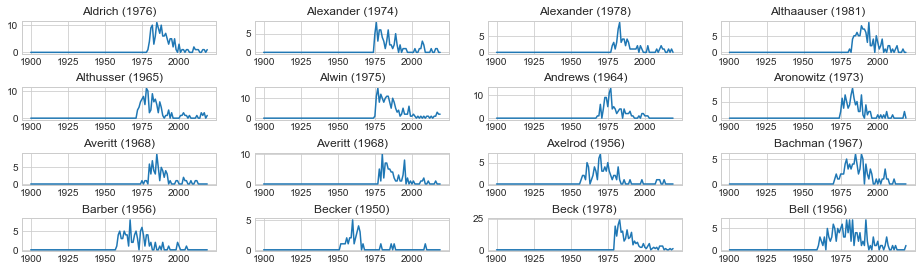

bendix|work authority ind
berry|cont urban ecology
bibb|1977| soc forces, v55, p975
bishop|discrete multivariat
black|behavior law
blalock|casual inferences no
blalock|methodology soc r
blalock|social stat
blalock|theory construction
blauner|alienation freedom
blau|formal org comp appr
blau|structure org
bogue|population us
bogue|structure metropolit
bohrnstedt|soc methodology
bonacich|1976| am sociol rev, v41, p31


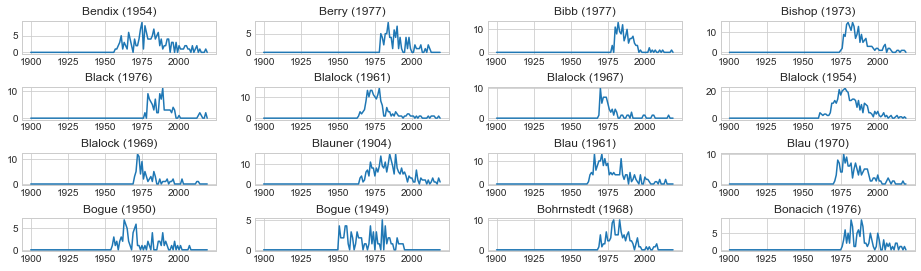

bowen|ec labor force parti
boyle|1970| am j sociol, v75, p461
bradburn|reports happiness
brown|social origins depre
brown|social psychol
burgess|engagement marriage
burgess|family traditional c
burgess|predicting success f
burns|management innovatio
carter|assessment quality g
chamblis|law order power
chapin|expt design sociolog
chinoy|automobile workers a
chiricos|1975| am sociol rev, v40, p753
cicourel|cognitive soc
cicourel|social organization


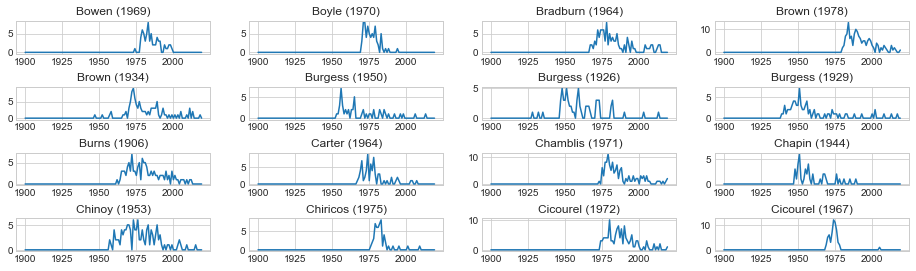

cohen|marxs theory hist
coleman|equality of educatio
coleman|intro mathematical s
cole|stratification sci
costner|1965| am sociol rev, v30, p341
crozier|bureaucrat phenomen
davis|human soc
davis|sociol methodol
dean|1961| am sociol rev, v25, p753
dohrenwend|social stress
dohrenwend|stressful life event
domhoff|higher circles
duncan|1966| am j sociol, v72, p3
duncan|indicators social ch
duncan|intro structural equ
duncan|socioeconomic backgr


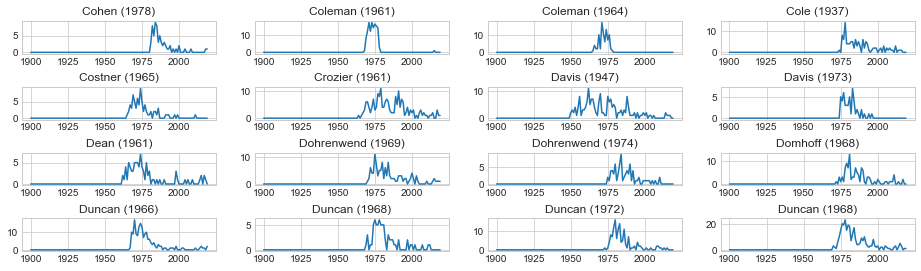

duncan|understanding povert
easton|children political s
edwards|labor market segment
epstein|womens place options
etzioni|active soc
etzioni|comparative analys 1
etzioni|complex org soc read
etzioni|modern organisations
featherman|1976| am sociol rev, v41, p462
feuer|conflict generations
fienberg|anal cross classific
flacks|1967| j soc issues, v23, p52
frazier|negro family chicago
friedrich|sociology sociology
fuguitt|sociological methodo
geertz|agr involution


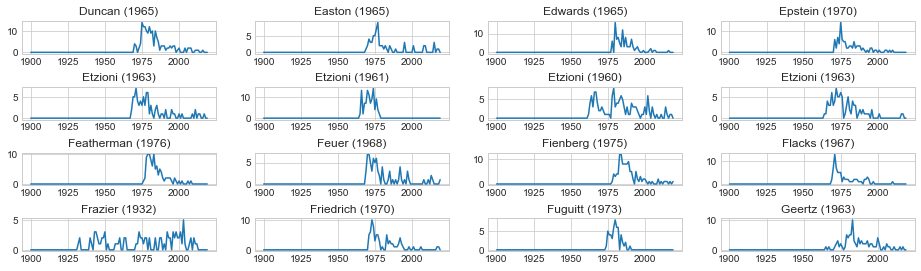

gerlach|people power change
goldberger|ec theory
goldthorpe|social grading occup
goodman|1954| j am stat assoc, v49, p732
goodman|1970| j am stat assoc, v65, p226
goodman|1972| am j sociol, v77, p1035
goodman|1972| am sociol rev, v37, p28
goodman|1973| am j sociol, v78, p1135
goodman|1979| j am stat assoc, v74, p537
goodman|anal qualitative cat
goodman|sociological methodo
gordon|1968| am j sociol, v73, p592
gordon|segmented work
gordon|theories poverty une
gouldner|1957| admin sci quart, v2, p281
gove|1973| am j sociol, v77, p812


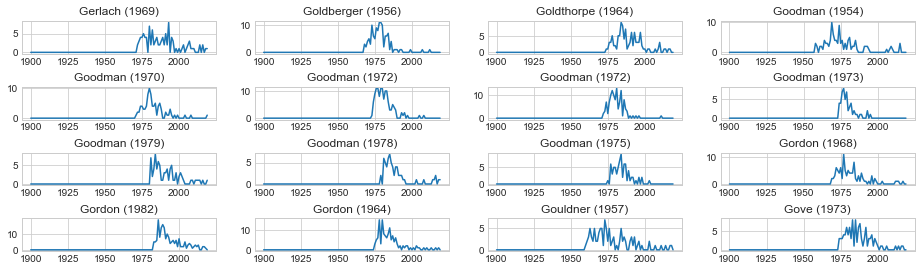

gove|labeling deviance ev
gross|explorations role an
gurin|am view their mental
haberman|anal qualitative dat
habermas|critical theory soc
hagen|1974| law soc rev, v8, p357
hagstrom|sci community
hall|org structure proces
hamilton|class politics us
hanushek|statistical methods
harary|structural models
harman|modern factor anal
hauser|1978| soc forces, v56, p919
hauser|process stratificati
hawley|urban soc
heise|causal anal


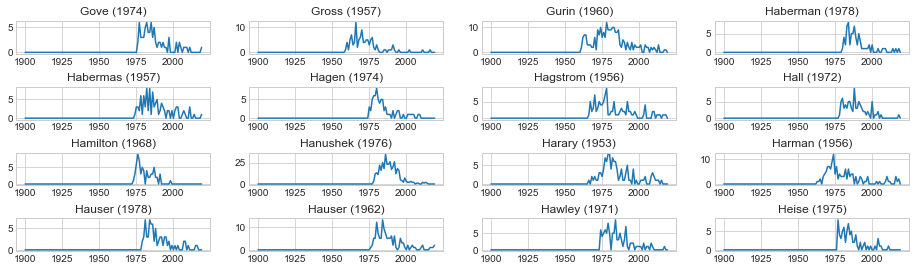

heise|soc methodology
hess|development politica
hodson|1978| polit soc, v8, p429
hoge|understanding church
hollingshead|2 factor index socia
hollingshead|elm towns youth impa
horan|1978| am sociol rev, v43, p534
hyman|class status power s
jackson|1962| am sociol rev, v27, p469
johnston|econometrics methods
joreskog|adv factor anal stru
joreskog|lisrel 6 anal linear
kahl|am class structure
kahl|measurement moderniz
katz|social psychology
kenniston|young radicals


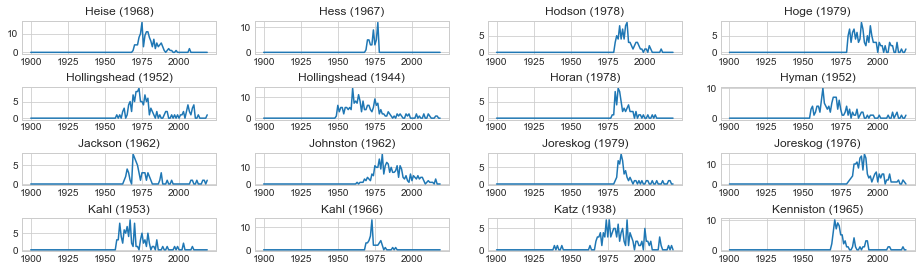

kerlinger|multiple regression
kmenta|elements econometric
kohn|1978| am j sociol, v84, p24
labovitz|1967| soc forces, v46, p151
labovitz|1970| am sociol rev, v35, p515
langner|1962| j health hum behav, v3, p269
lasch|haven heartless worl
lawrence|org env
lenski|1954| am sociol rev, v19, p405
lenski|human societies an i
lenski|religious factor soc
loomis|social systems
maccoby|psychol sex differen
mandel|late capitalism
marcuse|1 dimensional man
matza|becoming deviant


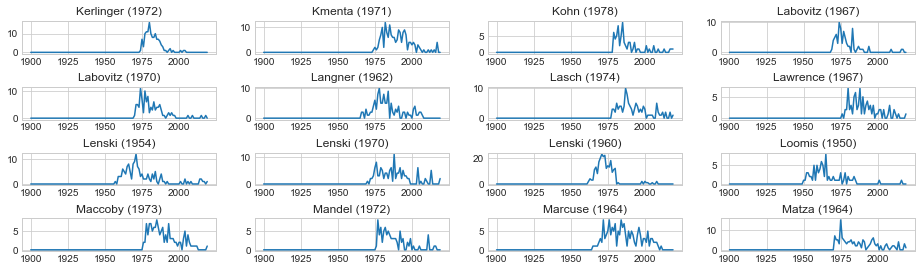

mechanic|med sociology
mitchell|soc networks urban
modell|ec basis ethnic soli
nettler|explaining crime
newcomb|social psychology
nye|statistical package
oconner|fiscal crisis state
ogburn|sociology
oppenheimer|female labor force u
parsons|essays soc theory
parsons|soc evolutionary com
parsons|struct soc action
parsons|theor sociol
parsons|towards general theo
parsons|working papers theor
parson|structure process mo


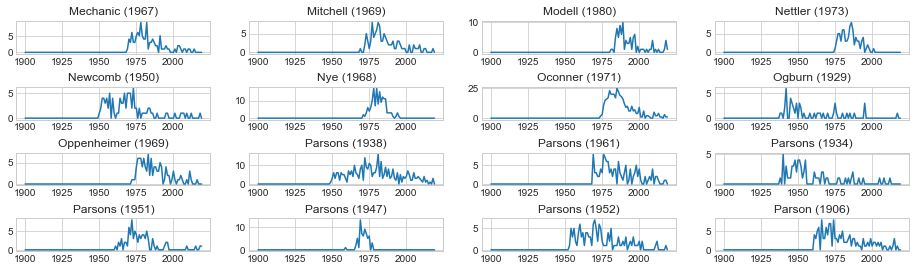

piliavin|1964| am j sociol, v70, p206
pindyck|econometric models e
piore|labour market segmen
platt|child savers
porter|the vertical mosaic
poulantzas|class cont capitalis
poulantzas|political power soci
quinney|social reality crime
radloff|1975| sex roles, v1, p249
reiss|occupation social st
riley|aging society
robinson|1979| am sociol rev, v44, p38
robinson|measures social psyc
roof|community commitment
rosenberg|occupation values
rosenfeld|1980| am sociol rev, v45, p583


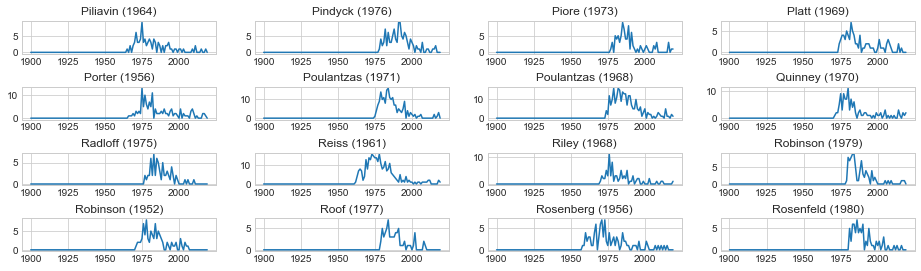

rossi|1974| am sociol rev, v39, p224
rozak|making countercultur
schmidt|grundriss empirisc 1
schur|labelling deviance e
sewell|1968| am j sociol, v73, p559
sewell|1980| am j sociol, v86, p551
shryock|methods materials de
siegel|thesis u chicago chi
simpson|racial cultural mino
smelser|social change
smith|sociology rural life
sorokin|soc culture personal
spilerman|1977| am j sociol, v83, p551
srole|mental health metrop
stolzenberg|1975| am sociol rev, v40, p645
stolzenberg|1978| am sociol rev, v43, p813


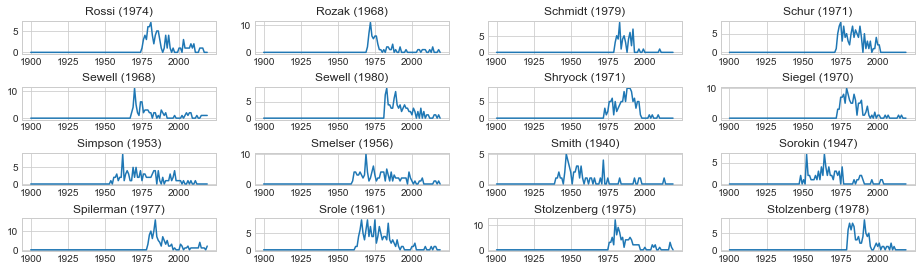

stolzenberg|sociol methodol
terman|psychol factors mart
theil|principles econometr
thompson|poverty theory
tolbert|1980| am j sociol, v85, p1095
treiman|1975| am sociol rev, v40, p174
tuma|1979| am j sociol, v84, p820
tuma|social dynamics mode
turner|social context ambit
u.s.|hist stat us
valentine|culture poverty
warner|social class am
warner|social life modern c
warren|community am
webb|unobstrusive measure
weber|economy society outl


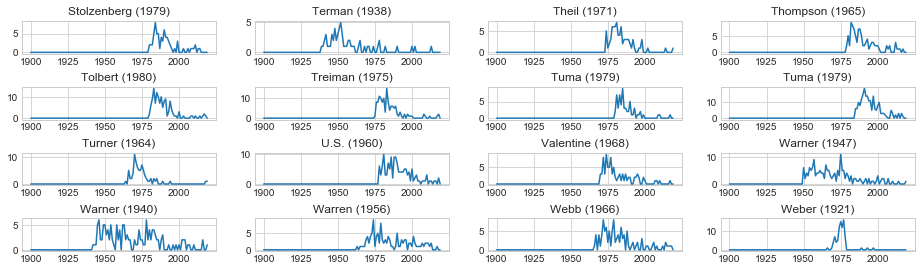

westergaard|class capitalist s 4
whyte|organization man
williams|am sociol
williams|strangers next door
wolf|1979| am sociol rev, v44, p232
woodward|ind org
wright|1958| am sociol rev, v23, p284
wright|1977| am sociol rev, v42, p32
wright|class structure inco
yinger|relig soc individual
yinger|scientific study rel
young|knowledge control ne
zeitlin|1974| am j sociol, v79, p1073
zimring|deterrence legal thr


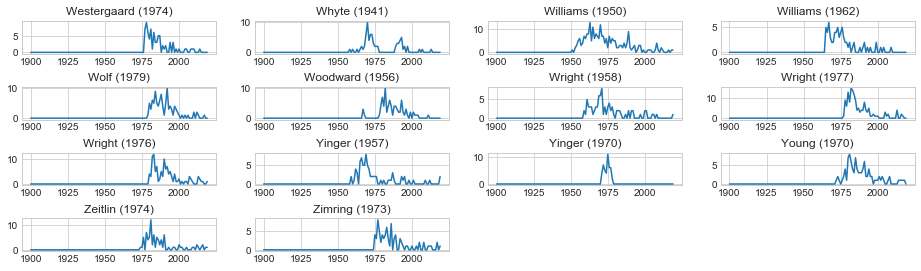

In [40]:
from random import sample

def summ(what):
    #display(HTML("<h3>%s (%s)</h3>" % what))
    try:
        display(HTML(citation_characterize( what, max_to_print_inner=2, max_to_print_outter=4 )))
    except ValueError:
        pass

alltop2 = sorted(alltop2)
blacklist = []
alltop2 = [x for x in alltop2 if x not in blacklist]
    
cols = 4
rows = len(alltop2) // cols + bool(len(alltop2) % cols) # = 15 for 5
rows_per_group = 4
groupsize = rows_per_group * cols
gs = rows // rows_per_group + bool(rows % rows_per_group)
    
for groupi in range(gs):
    plt.figure(figsize=(cols*4,rows*1.2))
    plt.subplots_adjust(hspace=1)
    
    for i,x in enumerate(alltop2[ groupi*groupsize : (groupi+1)*groupsize]):
        print(x)
        x = cysum[x]

        plt.subplot(rows,cols,i+1)

        nt = x['name']
        nt = nt.split("|")
        nt = (" ".join(nt[:-1]).title(), nt[-1])
        summ(nt)

        years = range(1900, 2020)
        vals = [cits['cy'][x['name'],y] for y in years]

        plt.plot(years,vals)
        plt.title("%s (%s)" % (x['name'].split("|")[0].title(), x['pub']))

        #linestyles = ['--','-','-.']
        #for i,k in enumerate(['death1','death2','death3']):
        #    if x[k] is not None:
        #        plt.axvline(x[k],min(vals),max(vals),label=k,linestyle=linestyles[i],color='black')
        #plt.legend();

    save_figure("biggest_death2.time series.%s" % groupi)
    plt.show();

# let's show trends for other top 1% most successful

althaauser|sociol perspect
baron|monopoly capital ess
becker|art worlds
becker|boys white student c
becker|outsiders studies in
bellah|habits hearts indivi
belsley|regression diagnosti
blalock|theory minority grou
bourdieu|distinctions social
douglas|purity danger anal c
duncan|occupational hlth sa
duncan|socioeconomic backgr
friedman|ind labour
geertz|agr involution
goffman|interaction
goldthorpe|affluent worker poli


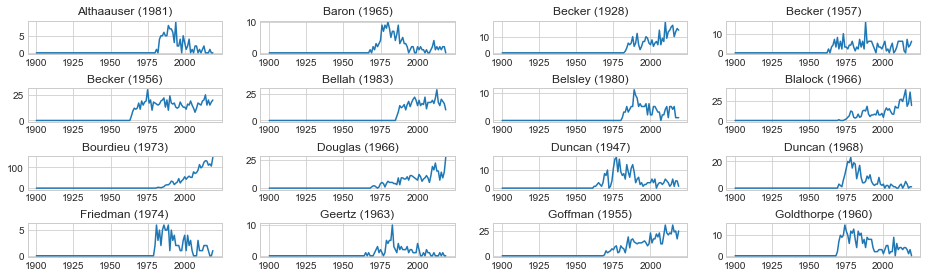

goodman|1954| j am stat assoc, v49, p732
gordon|assimiliation am lif
habermas|critical theory soc
hall|policing crises mugg
harman|modern factor anal
hirsch|causes delinquency
hoge|understanding church
jenkins|1977| am sociol rev, v42, p249
labovitz|1970| am sociol rev, v35, p515
land|sociol methodol
lawrence|org env
lieberson|piece pie blacks whi
linton|study man
marx|selected works 2 vol
mccarthy|trend social movemen
mcclelland|achieving society


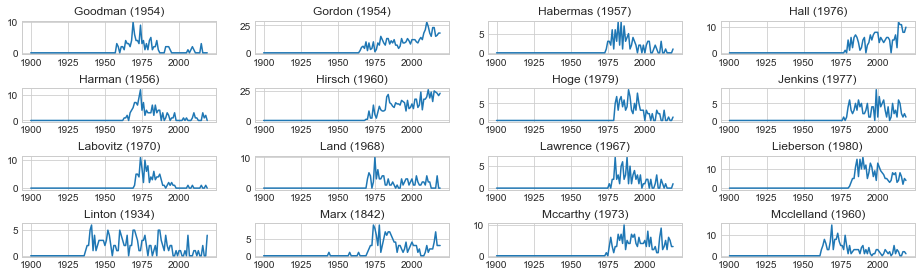

mills|1940| am sociol rev, v5, p904
mills|power elite
mills|sociological imaging
mincer|schooling experience
riesman|lonely crowd study c
seeman|1959| am sociol rev, v24, p788
sennett|hidden injuries clas
snow|1980| am sociol rev, v45, p787
snyder|1979| am j sociol, v84, p1097
sorokin|social mobility
srole|mental health metrop
stack|all our kin strategi
sykes|1957| am sociol rev, v22, p667
veblen|theory leisure class
warner|social life modern c
webb|unobstrusive measure


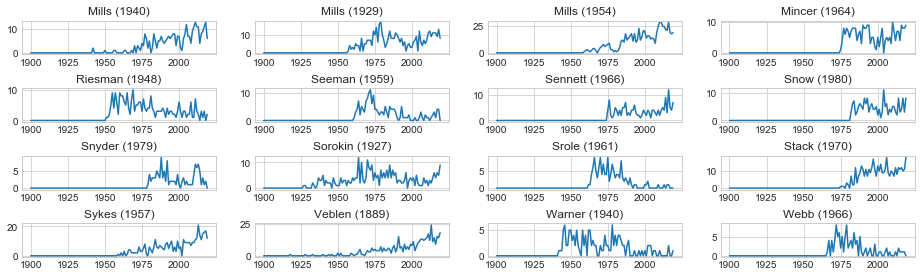

weber|protestantische ethi
whyte|street corner soc so
willis|learning labour why
wilson|the truly disadvanta
wolfang|subculture violence
wolf|1979| am sociol rev, v44, p232
young|knowledge control ne
zimring|deterrence legal thr


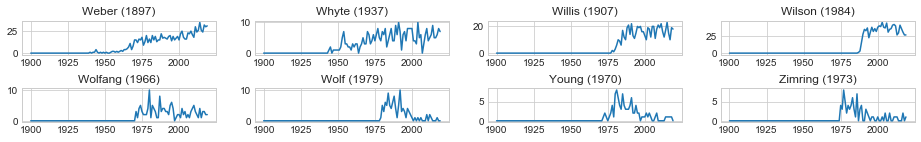

In [37]:
from random import sample

def summ(what):
    #display(HTML("<h3>%s (%s)</h3>" % what))
    try:
        display(HTML(citation_characterize( what, max_to_print_inner=2, max_to_print_outter=4 )))
    except ValueError:
        pass

allalltop = sorted(sample(allalltop, 4*14))
blacklist = []
allalltop = [x for x in allalltop if x not in blacklist]
    
cols = 4
rows = len(allalltop) // cols + bool(len(allalltop) % cols) # = 15 for 5
rows_per_group = 4
groupsize = rows_per_group * cols
gs = rows // rows_per_group + bool(rows % rows_per_group)
    
for groupi in range(gs):
    plt.figure(figsize=(cols*4,rows*1.2))
    plt.subplots_adjust(hspace=1)
    
    for i,x in enumerate(allalltop[ groupi*groupsize : (groupi+1)*groupsize]):
        print(x)
        x = cysum[x]

        plt.subplot(rows,cols,i+1)

        nt = x['name']
        nt = nt.split("|")
        nt = (" ".join(nt[:-1]).title(), nt[-1])
        summ(nt)

        years = range(1900, 2020)
        vals = [cits['cy'][x['name'],y] for y in years]

        plt.plot(years,vals)
        plt.title("%s (%s)" % (x['name'].split("|")[0].title(), x['pub']))

        #linestyles = ['--','-','-.']
        #for i,k in enumerate(['death1','death2','death3']):
        #    if x[k] is not None:
        #        plt.axvline(x[k],min(vals),max(vals),label=k,linestyle=linestyles[i],color='black')
        #plt.legend();

    save_figure("biggest_cits.time series.%s" % groupi)
    plt.show();

# crap. who knows what

In [63]:
allcounts = {c for c,_ in dying_count['death3']}

In [64]:
for cutoff in [5,10,20]:

    for dk in ['death1','death2','death3']:
        totlim = sum( dying_count[dk][(c,"total")] for c in allcounts if c >= cutoff )
        proplim = sum( dying_count[dk][(c,True)] for c in allcounts if c >= cutoff ) / totlim
        
        tot = sum( dying_count[dk][(c,"total")] for c in allcounts )
        prop = sum( dying_count[dk][(c,True)] for c in allcounts ) / tot

        print("%0.2f%% of the %s with >=%s maxcount have %s (%0.2f%% of %s overall)" % (
            100*proplim,
            totlim,
            cutoff,
            dk,
            100*prop,
            tot
        ))
    
    print("---------------------")

98.24% of the 10446 with >=5 maxcount have death1 (98.77% of 72887 overall)
69.26% of the 10446 with >=5 maxcount have death2 (80.18% of 72887 overall)
43.84% of the 10446 with >=5 maxcount have death3 (73.93% of 72887 overall)
---------------------
97.73% of the 3788 with >=10 maxcount have death1 (98.77% of 72887 overall)
57.97% of the 3788 with >=10 maxcount have death2 (80.18% of 72887 overall)
25.77% of the 3788 with >=10 maxcount have death3 (73.93% of 72887 overall)
---------------------
97.43% of the 1323 with >=20 maxcount have death1 (98.77% of 72887 overall)
44.60% of the 1323 with >=20 maxcount have death2 (80.18% of 72887 overall)
12.40% of the 1323 with >=20 maxcount have death3 (73.93% of 72887 overall)
---------------------


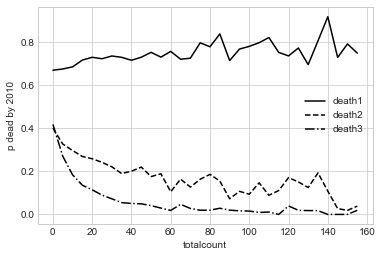

In [8]:
dying_count = defaultdict(lambda:defaultdict(int))

step = 5

for x in cysum.values():
    for dk in ['death1','death2','death3']:
        dying_count[dk][(
            (x['total']//step)*step,
            x[dk] is not None
        )] += 1

counts = range(0,160,step)

linestyles = ['-','--','-.']

for i,dk in enumerate(['death1','death2','death3']):
    probs = [ dying_count[dk][(c,True)]/(dying_count[dk][(c,True)]+dying_count[dk][(c,False)]) if (dying_count[dk][(c,True)]+dying_count[dk][(c,False)]>0) else 0 for c in counts ]
    plt.plot(counts,probs,label=dk,linestyle=linestyles[i], color='black')

plt.xlabel("totalcount")
plt.ylabel("p dead by 2010")
plt.legend();

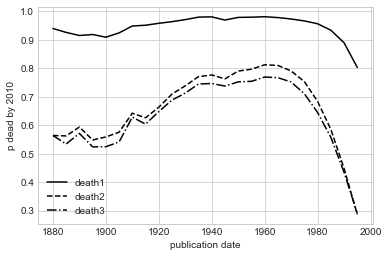

In [9]:
dying_count = defaultdict(lambda:defaultdict(int))

step = 5

for x in cysum.values():
    for dk in ['death1','death2','death3']:
        dying_count[dk][(
            (x['pub']//step)*step,
            x[dk] is not None
        )] += 1

counts = range(1880,2000,step)

linestyles = ['-','--','-.']

for i,dk in enumerate(['death1','death2','death3']):
    probs = [ dying_count[dk][(c,True)]/(dying_count[dk][(c,True)]+dying_count[dk][(c,False)]) if (dying_count[dk][(c,True)]+dying_count[dk][(c,False)]>0) else 0 for c in counts ]
    plt.plot(counts,probs,label=dk,linestyle=linestyles[i], color='black')

plt.xlabel("publication date")
plt.ylabel("p dead by 2010")
plt.legend();

In [17]:
keys = sorted(cysum_filt[0].keys())

rows = [
    [x[k] for k in keys]
    for x in cysum_filt
]

display(HTML(tabulate(rows, headers=keys, tablefmt='html')))

death1,death2,death3,first,last,maxcount,maxcounty,maxprop,maxpropy,name,pub,total,totalprop,type
2019,,,1981,2020,149,2019,0.0452561,2010,bourdieu|distinctions social,1973,2200,0.985802,book
2013,,,2001,2020,116,2013,0.0410448,2008,putnam|bowling along collap,1993,1336,0.548817,book
,,,2007,2020,81,2019,0.0229462,2019,charmaz|constructed grounded,2006,490,0.178509,book
2019,,,1958,2020,79,2019,0.0268112,2003,goffman|presentation self ev,1952,1701,0.943225,book
2014,,,1969,2020,71,2014,0.0298945,2004,glasser|discovery grounded t,1963,1425,0.69529,book
,,,1965,2020,66,2019,0.0186969,2019,goffman|stigma notes managme,1959,917,0.448966,book
,,,1988,2020,66,2019,0.0186969,2019,"west|1987| gender soc, v1, p124",1987,719,0.312029,article
,,,1973,2020,65,2011,0.0262391,2020,"granovetter|1973| am j sociol, v78, p360",1973,1042,0.489449,article
,,,2002,2020,65,2018,0.0197448,2018,"mcpherson|2001| annu rev sociol, v27, p415",2001,596,0.222545,article
,,,1988,2020,64,2014,0.020813,2014,"diener|1985| j pers assess, v49, p91",1985,401,0.161273,article


In [10]:
died = [r[2] for r in rows]
print(sum(x is not None for x in died)/len(died))

0.32
